In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist, cosine
from scipy.ndimage import convolve1d
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import tensorflow as tf
from joblib import Parallel, delayed

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [92]:
#ds = xr.open_dataset('../rainFlagRemovedBuoyDataBadQualityRemovedMatchup.nc')
ds = xr.open_dataset('goodData_QSwithTAO_with2hrStatsConv.nc')
df = ds.to_dataframe()
df_orig = df.copy()

In [93]:
list(df.keys())

['Wind Direction (TAO)',
 'WDIR_QC',
 'WDIR_DM',
 'Wind Speed (TAO)',
 'WSPD_QC',
 'WSPD_DM',
 'Zonal Wind Speed (TAO)',
 'Meridional Wind Speed (TAO)',
 'Sea Surface Temperature (TAO)',
 'SST_QC',
 'SST_DM',
 'Relative Humidity (TAO)',
 'RELH_QC',
 'RELH_DM',
 'Air Temperature (TAO)',
 'AIRT_QC',
 'AIRT_DM',
 'Neutral Wind Speed at 10m (TAO)',
 'Wind Speed at 10m (TAO)',
 'mean_WSPD',
 'std_WSPD',
 'mean_WSPD_10N',
 'std_WSPD_10N',
 'mean_SST',
 'std_SST',
 'mean_AIRT',
 'std_AIRT',
 'mean_SST - AIRT',
 'std_SST - AIRT',
 'mean_RELH',
 'std_RELH',
 'mean_U10N_x',
 'std_U10N_x',
 'mean_U10N_y',
 'std_U10N_y',
 'mean_cosWDIR',
 'std_cosWDIR',
 'mean_sinWDIR',
 'std_sinWDIR',
 'LATITUDE',
 'LONGITUDE',
 'TAO_TIME',
 'Deployment index',
 'Wind Speed (QuikSCAT)',
 'Wind Direction (QuikSCAT)',
 'rain_impact',
 'flags',
 'eflags',
 'nudge_wind_speed',
 'nudge_wind_direction',
 'retrieved_wind_speed_uncorrected',
 'cross_track_wind_speed_bias',
 'atmospheric_speed_bias',
 'wind_obj',
 'ambigu

In [95]:
# df['cos(Direction Difference (QuikSCAT - TAO))'] = np.cos(np.deg2rad(df['Direction Difference (QuikSCAT - TAO)']))
# df['sin(Direction Difference (QuikSCAT - TAO))'] = np.sin(np.deg2rad(df['Direction Difference (QuikSCAT - TAO)']))


# for timeWindow in range(20,120,10):
#     df[f'cos(Direction Difference (QuikSCAT - TAO {timeWindow} min mean))'] = np.cos(np.deg2rad(df[f'Direction Difference (QuikSCAT - TAO {timeWindow} min mean)']))
#    df[f'sin(Direction Difference (QuikSCAT - TAO {timeWindow} min mean))'] = np.sin(np.deg2rad(df[f'Direction Difference (QuikSCAT - TAO {timeWindow} min mean)']))

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

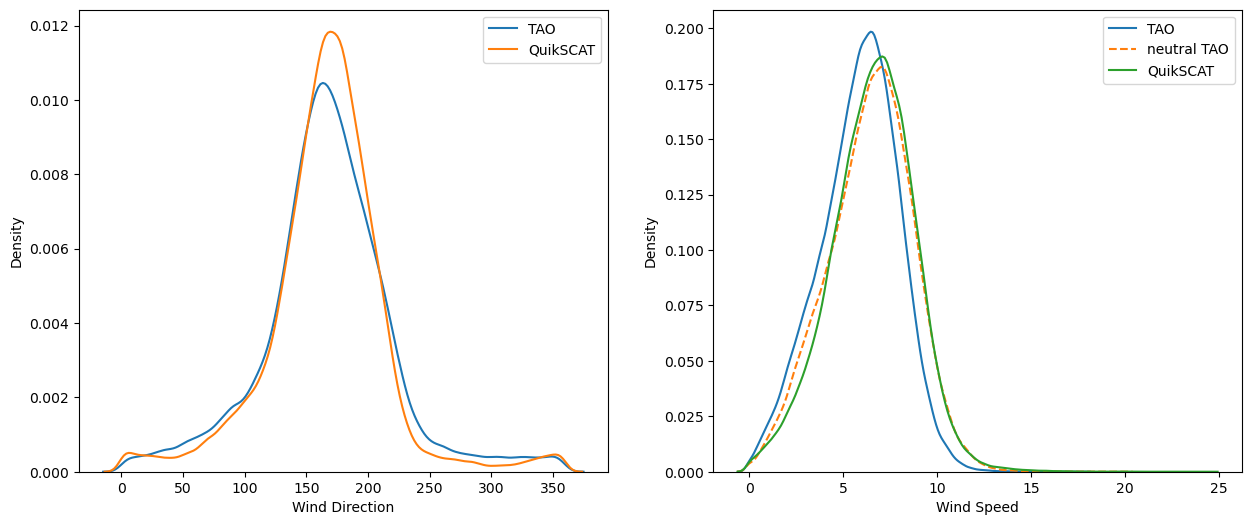

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))

ax = axes[0]
sns.kdeplot(df['Wind Direction (TAO)'], ax = ax, label = 'TAO')
#sns.kdeplot(df['mean WDIR 30min'], ax = ax, label = 'TAO (30 min mean)')
#sns.kdeplot(df['mean WDIR 60min'], ax = ax, label = 'TAO (1 hr mean)')
#sns.kdeplot(df['mean WDIR 120min'], ax = ax, label = 'TAO (2 hr mean)')
sns.kdeplot(df['Wind Direction (QuikSCAT)'], ax = ax, label = 'QuikSCAT')
ax.set_xlabel('Wind Direction')
ax.legend()

ax = axes[1]
sns.kdeplot(df['Wind Speed (TAO)'], ax = ax, label = 'TAO')
#sns.kdeplot(df['mean WSPD 30min'], ax = ax, label = 'TAO (30 min mean)')
#sns.kdeplot(df['mean WSPD 60min'], ax = ax, label = 'TAO (1 hr mean)')
#sns.kdeplot(df['mean WSPD 120min'], ax = ax, label = 'TAO (2 hr mean)')

sns.kdeplot(df['Neutral Wind Speed at 10m (TAO)'], linestyle="--", ax = ax, label = 'neutral TAO')
#sns.kdeplot(df['mean WSPD_10N 30min'], linestyle="--", ax = ax, label = 'neutral TAO (30 min mean)')
#sns.kdeplot(df['mean WSPD_10N 60min'], linestyle="--", ax = ax, label = 'neutral TAO (1 hr mean)')
#sns.kdeplot(df['mean WSPD_10N 120min'], linestyle="--", ax = ax, label = 'neutral TAO (2 hr mean)')

sns.kdeplot(df['Wind Speed (QuikSCAT)'], ax = ax, label = 'QuikSCAT')
ax.set_xlabel('Wind Speed')
ax.legend()

0.8659971464515444

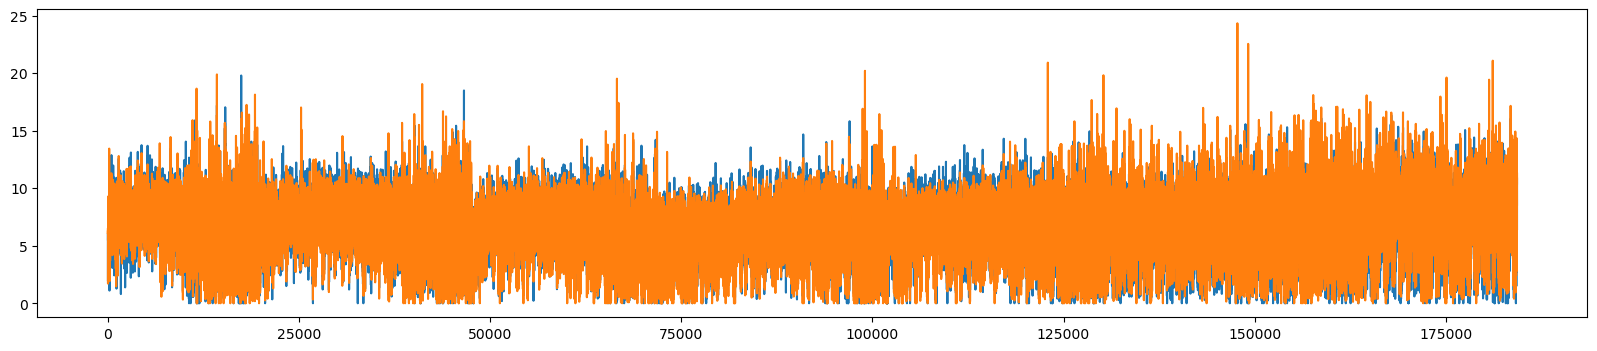

In [97]:
plt.figure(figsize=(20,4))
plt.plot(df['Neutral Wind Speed at 10m (TAO)'])
plt.plot(df['Wind Speed (QuikSCAT)'])
np.corrcoef(df['Wind Speed (TAO)'], df['Wind Speed (QuikSCAT)'])[0,1]

0.671077822660057

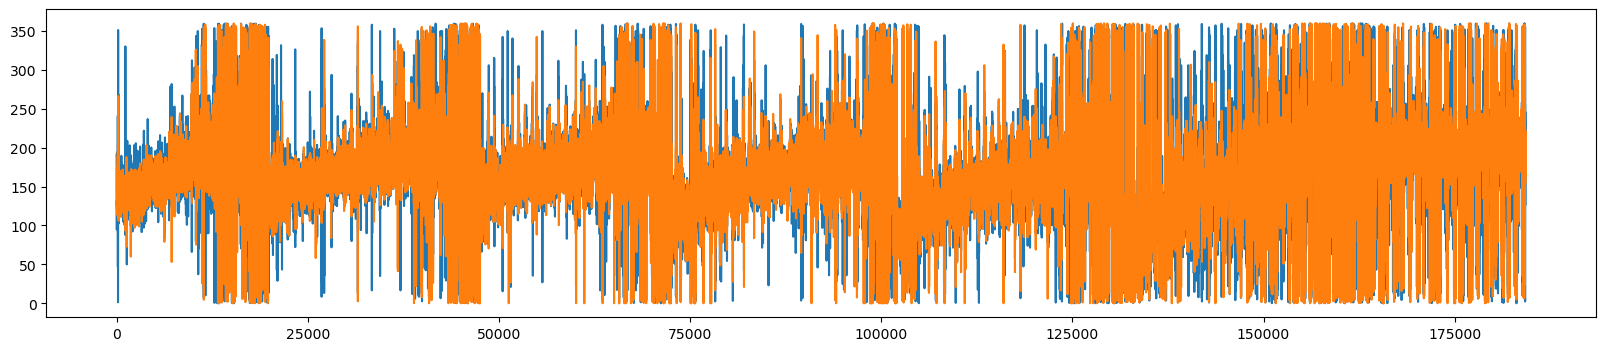

In [98]:
plt.figure(figsize=(20,4))
plt.plot(df['Wind Direction (TAO)'])
plt.plot(df['Wind Direction (QuikSCAT)'])
np.corrcoef(df['Wind Direction (TAO)'], df['Wind Direction (QuikSCAT)'])[0,1]

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.1, 0.95, 'B')

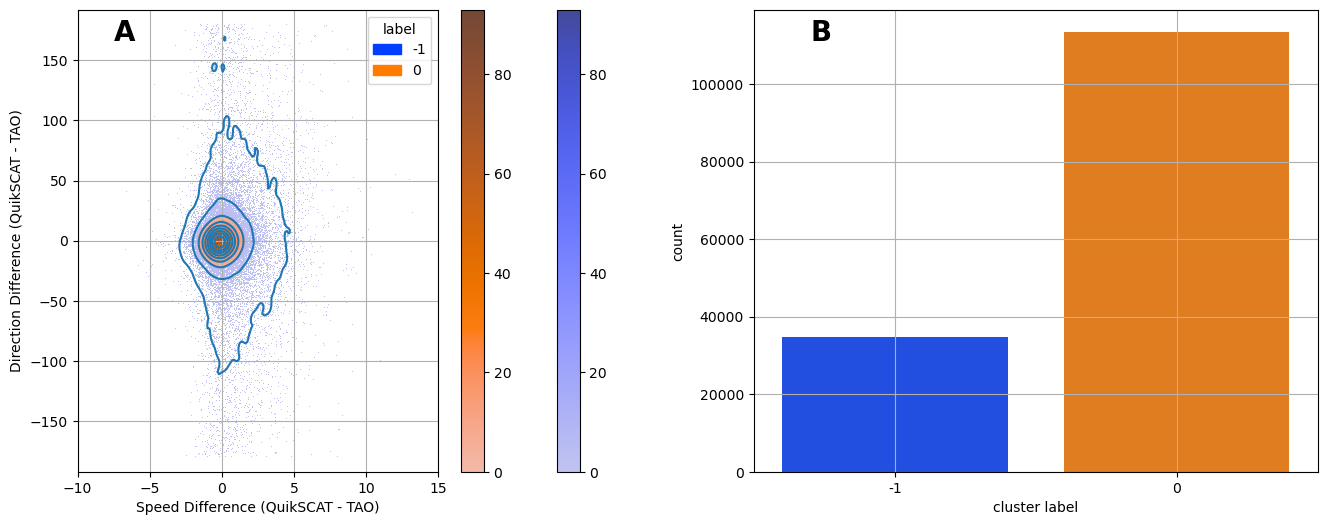

In [101]:
selectX = ['Speed Difference (QuikSCAT - TAO)',
          'cos(Direction Difference (QuikSCAT - TAO))',
          'sin(Direction Difference (QuikSCAT - TAO))']


X = df[selectX]

normX = (X - X.mean(axis=0))/ X.std(axis=0)

# kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto", max_iter = 10000).fit(normX)
# df['label'] = kmeans.labels_

dbscan = DBSCAN(eps=0.15, min_samples= 500)
df['label'] = dbscan.fit_predict(normX)

# optics = OPTICS(min_samples=50 ) #cluster_method='dbscan', eps=0.25)
# df['label'] = optics.fit_predict(normX)

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# ax.remove()  # Remove the existing second subplot
# ax = fig.add_subplot(121, projection='polar')
xlabel = 'Speed Difference (QuikSCAT - TAO)'
ylabel = 'Direction Difference (QuikSCAT - TAO)'

s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                hue='label', common_norm=True, cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

s = sns.kdeplot(df, x=xlabel, y = ylabel, levels=10, 
                ax = ax)

ax.grid(visible=True, which='both', axis='both')

ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax.set_xlim(-10,15)

ax = axes[1]
s = sns.countplot(df, x='label',palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('cluster label')
#ax.set_ylabel('cluster label')

ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#plt.savefig('PDF_byCluster_10min.png', dpi=100)

In [102]:
goodBad = np.array(['good' for i in range(len(df))])
print(len(goodBad))
mask = df['label'].isin([-1])
goodBad[mask] = 'bad'
df['GoodBad'] = goodBad

def getGoodBad(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:    
        goodCount = len(subDF.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        badCount = len(subDF.loc[subDF['GoodBad'] == 'bad'])/len(subDF)*100
        return f' {goodCount:3.0f},{badCount:3.0f}'
    else:
        return ''

def getBadPercent(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    
    if isPresent:
        goodCount = len(subDF.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        badCount = len(subDF.loc[subDF['GoodBad'] == 'bad'])/len(subDF)*100
        
        return badCount
    else:
        return -999

def getCount(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        count = len(subDF) #.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        return count
    else:
        return -999

148300


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

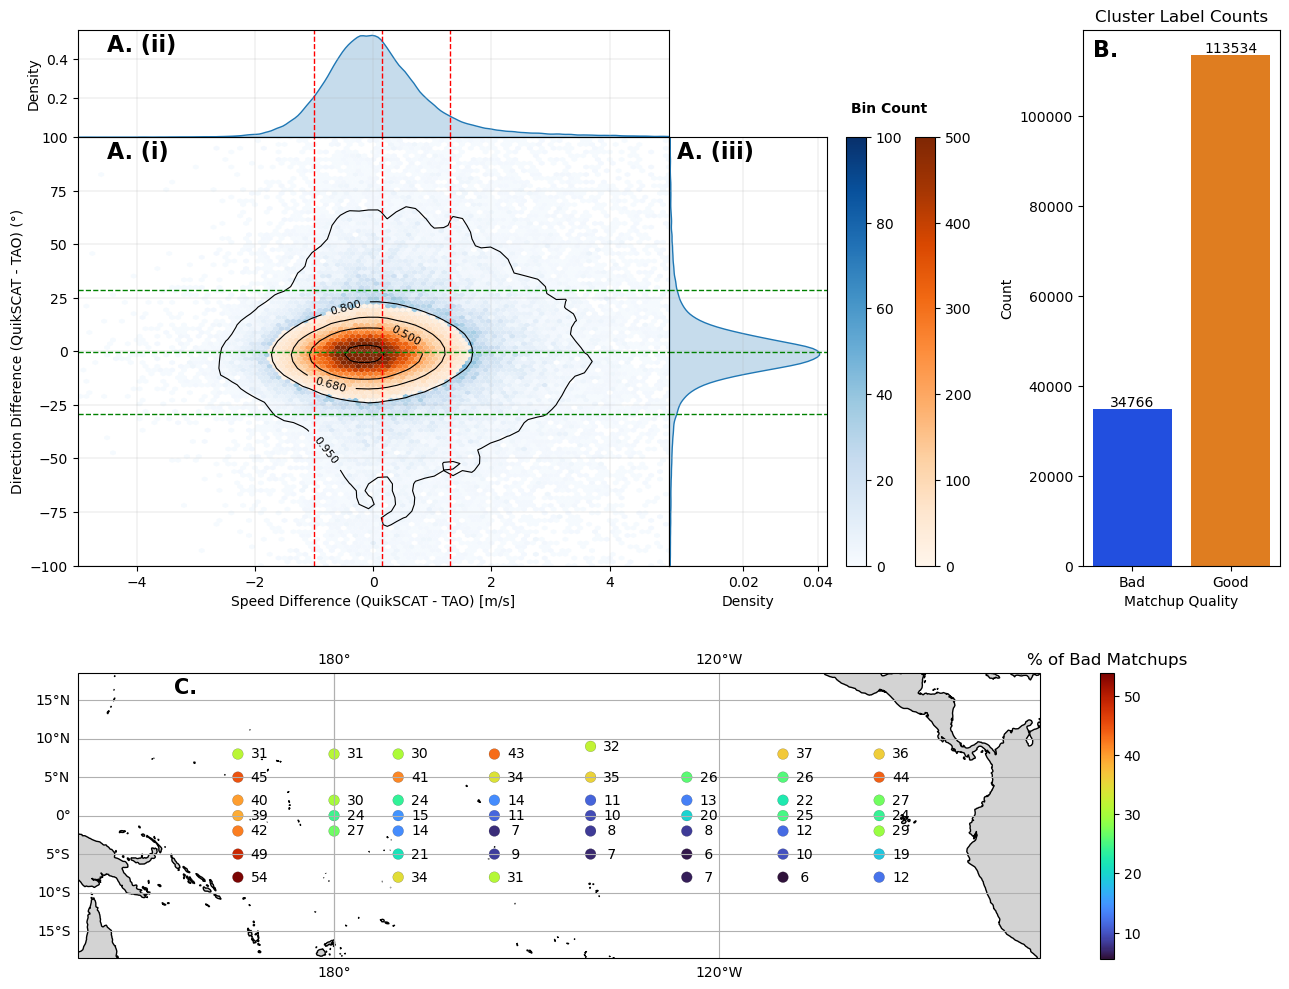

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd

# Example DataFrame: df must contain 'label', 'speed', 'direction'
# Replace these with your actual column names
xlabel = 'Speed Difference (QuikSCAT - TAO)'
ylabel = 'Direction Difference (QuikSCAT - TAO)'

# Compute mean and std
mu_speed = df[xlabel].mean()
std_speed = df[xlabel].std()
mu_dir = df[ylabel].mean()
std_dir = df[ylabel].std()

# Create overall figure
fig = plt.figure(figsize=(13, 10))
gs = gridspec.GridSpec(4, 8, width_ratios=[3, 0.8, 0.1, 0.1, 0.25, 0.1, 0.75, 1], height_ratios=[0.75, 3, 0.75, 2], wspace=0, hspace=0)

# Joint and marginals (LEFT)
ax_joint = fig.add_subplot(gs[1, 0])
ax_marg_x = fig.add_subplot(gs[0, 0], sharex=ax_joint)
ax_marg_y = fig.add_subplot(gs[1, 1], sharey=ax_joint)
ax_cb1 = fig.add_subplot(gs[1,3])
ax_cb2 = fig.add_subplot(gs[1,5])

# Countplot (RIGHT)
ax_count = fig.add_subplot(gs[0:2, -1])  # spans both rows

# -------------------------
# 1. JOINT HISTOGRAM + KDE

colors = [plt.cm.Blues, plt.cm.Oranges]
hexcounts = [100, 100]
x_min, x_max, y_min, y_max = -5, 5, -100, 100
vmins = [0, 0]
vmaxs = [100, 500]
numcontours = 5

for i, (label, ax, ax_cb) in enumerate(zip([-1, 0], [ax_joint, ax_joint], [ax_cb1, ax_cb2])):
    df_label = df[df['label'] == label]

    hb = ax.hexbin(
        x=df_label[xlabel],
        y=df_label[ylabel],
        gridsize=hexcounts[i],
        cmap=colors[i],
        mincnt=1,
        linewidths=0.01,
        edgecolors=(0, 0, 0, 0.01),
        vmin=vmins[i],            # ← custom lower limit
        vmax=vmaxs[i],             # ← custom upper limit
        extent=(x_min, x_max, y_min, y_max)
    )

    # Extract colorbar for this label
    cbar = fig.colorbar(hb, cax=ax_cb)
    
#cbar.set_label("Bin Count")
cbar.ax.text(
    0.6, 1.05,                        # x=50% of width, y=just above the top
    "Bin Count",                     # your label
    ha='right', va='bottom',        # horizontal center, baseline aligned
    fontsize=10, fontweight='bold',  # optional styling
    transform=cbar.ax.transAxes      # relative to colorbar axis
)

# Create the Joint PDF plot and capture the returned QuadContourSet object
# KDE Grid resolution
nx, ny = 64, 64

# Data
x = df[xlabel].values
y = df[ylabel].values
xy = np.vstack([x, y])

# KDE with specified bandwidth
kde = gaussian_kde(xy, bw_method=0.1)

# Grid over which to evaluate
xx, yy = np.mgrid[x_min:x_max:nx*1j, y_min:y_max:ny*1j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
z = kde(grid_coords).reshape(xx.shape)

# Normalize z to make it a probability surface (area ≈ 1)
dx = (x_max - x_min) / nx
dy = (y_max - y_min) / ny
z_prob = z / z.sum() #/ (dx * dy)

# Flatten and sort to get cumulative distribution
z_flat = z_prob.flatten()
z_sorted = np.sort(z_flat)[::-1]  # 🔄 descending order
z_cumsum = np.cumsum(z_sorted)

# Desired probability masses for contours
mass_levels = [0.1, 0.5, 0.68, 0.8, 0.95]
mass_levels.reverse()
levels = [z_sorted[np.searchsorted(z_cumsum, mass)] for mass in mass_levels]


#levels.sort()
# Plot contours
contour = ax_joint.contour(xx, yy, z_prob, levels=levels, colors='black', linewidths=0.8)

# Label with probability instead of density
fmt = {}
for l, s in zip(contour.levels, mass_levels):
    fmt[l] = f"{s:.3f}"  # show enclosed probability

#fmt = {level: f"{mass:.3f}" for level, mass in zip(levels, mass_levels)}

ax_joint.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=8)
# # Add labels to the contour lines
# ax_joint.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

# 2. MARGINAL KDEs
sns.kdeplot(data=df, x=xlabel, fill=True, legend=False, ax=ax_marg_x, clip = (x_min, x_max) , cut = 0, bw_adjust=0.5 )
sns.kdeplot(data=df, y=ylabel, fill=True, legend=False, ax=ax_marg_y, clip = (y_min, y_max) , cut = 0, bw_adjust=0.5 )

# Remove marginal axis ticks
ax_marg_x.tick_params(bottom=False, labelbottom=False)
ax_marg_y.tick_params(left=False, labelleft=False)

# Add ±1σ lines
for x in [mu_speed - std_speed, mu_speed, mu_speed + std_speed]:
    ax_joint.axvline(x, color='red', linestyle='--', linewidth=1)
    ax_marg_x.axvline(x, color='red', linestyle='--', linewidth=1)  
    ax_marg_x.set_yticks([0.2,0.4])

for y in [mu_dir - std_dir, mu_dir, mu_dir + std_dir]:
    ax_joint.axhline(y, color='green', linestyle='--', linewidth=1)
    ax_marg_y.axhline(y, color='green', linestyle='--', linewidth=1)
    ax_marg_y.set_xticks([0.02,0.04])


# Axis labels
ax_joint.set_xlabel(xlabel + ' [m/s]')
ax_joint.set_ylabel(ylabel + " (°)")
ax_marg_x.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_marg_y.tick_params(axis='y', which='both', left=False, labelleft=False)
ax_marg_x.set_xlabel(None)
ax_marg_y.set_ylabel(None)

# Label the panel
ax_joint.text(0.05, 0.95, 'A. (i)', transform=ax_joint.transAxes, fontsize=16, weight='bold')
ax_marg_x.text(0.05, 0.80, 'A. (ii)', transform=ax_marg_x.transAxes, fontsize=16, weight='bold')
ax_marg_y.text(0.05, 0.95, 'A. (iii)', transform=ax_marg_y.transAxes, fontsize=16, weight='bold')

# -------------------------
# 3. COUNTPLOT
s = sns.countplot(data=df, x='label', palette='bright', ax=ax_count)
s.bar_label(s.containers[0])
ax_count.set_title("Cluster Label Counts")
#ax_count.set_xticks([-1, 0])                    # positions (the actual cluster labels)
ax_count.set_xticklabels(["Bad", "Good"])       # the new labels shown on the axis
ax_count.set_xlabel("Matchup Quality")
ax_count.set_ylabel("Count")
ax_count.text(0.05, 0.95, 'B.', transform=ax_count.transAxes, fontsize=16, weight='bold')

# Final adjustments

ax_joint.set_xlim(x_min, x_max)
ax_joint.set_ylim(y_min,  y_max)
ax_joint.grid(lw = 0.2)

ax_marg_x.set_xlim(x_min, x_max)
ax_marg_x.grid(lw = 0.2)

ax_marg_y.set_ylim(y_min,  y_max)
ax_marg_y.grid(lw = 0.2)

######################################################################################################################

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
dotSize = 60
slw = 0.1

latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

ax = fig.add_subplot(gs[3,:], projection=ccrs.PlateCarree(central_longitude=180))
ax.set_aspect(1.2)

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    txt = getGoodBad(lat, lon, df)
    

    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if txt != '': 
        badPercent = getBadPercent(lat, lon, df)
        #print(badPercent)
        txt = f'{badPercent:2.0f}'
        ax.text(xpos+2, lat-0.5, txt)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, badPercent]])), axis = 0)

x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.turbo)    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('% of Bad Matchups')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'C. ', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


plt.tight_layout()

plt.savefig('clustering.pdf', dpi=100)


In [105]:
def getSpeedBias(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Neutral Wind Speed at 10m (TAO)'
        else:
            TAOlabel = f'mean WSPD_10N {timeWindow}min'
        QSspeed = subDF['Wind Speed (QuikSCAT)'].to_numpy()
        TAOspeed = subDF[TAOlabel].to_numpy()
        corr = np.mean(QSspeed) - np.mean(TAOspeed)
        return corr
    else:
        return -999

def getSpeedRMSE(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Neutral Wind Speed at 10m (TAO)'
        else:
            TAOlabel = f'mean WSPD_10N {timeWindow}min'
        QSspeed = subDF['Wind Speed (QuikSCAT)'].to_numpy()
        TAOspeed = subDF[TAOlabel].to_numpy()
        corr = np.sqrt(np.mean((QSspeed - TAOspeed)**2))
        return corr
    else:
        return -999


def getSpeedCorrelation(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Neutral Wind Speed at 10m (TAO)'
        else:
            TAOlabel = f'mean WSPD_10N {timeWindow}min'
        QSspeed = subDF['Wind Speed (QuikSCAT)'].to_numpy()
        TAOspeed = subDF[TAOlabel].to_numpy()
        corr = np.corrcoef(QSspeed, TAOspeed)[0,1]
        return corr
    else:
        return -999

#########################################################################################3

def getDirBias(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Wind Direction (TAO)'
        else:
            TAOlabel = f'mean WDIR {timeWindow}min'
        QSdir = subDF['Wind Direction (QuikSCAT)'].to_numpy()
        TAOdir = subDF[TAOlabel].to_numpy()
        corr = np.mean(QSdir)- np.mean(TAOdir)
        return corr
    else:
        return -999


def getDirRMSE(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Wind Direction (TAO)'
        else:
            TAOlabel = f'mean WDIR {timeWindow}min'
        QSdir = subDF['Wind Direction (QuikSCAT)'].to_numpy()
        TAOdir = subDF[TAOlabel].to_numpy()
        diff = QSdir - TAOdir
        diff[diff>180] -= 360
        diff[diff<-180] += 360
        corr = np.sqrt(np.mean(diff**2))
        return corr
    else:
        return -999
        
def getDirCorrelation(lat, lon, df, timeWindow=10, isPresent = False):
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Wind Direction (TAO)'
        else:
            TAOlabel = f'mean WDIR {timeWindow}min'
        QSdir = subDF['Wind Direction (QuikSCAT)'].to_numpy()
        TAOdir = subDF[TAOlabel].to_numpy()
        corr = np.corrcoef(QSdir, TAOdir)[0,1]
        return corr
    else:
        return -999



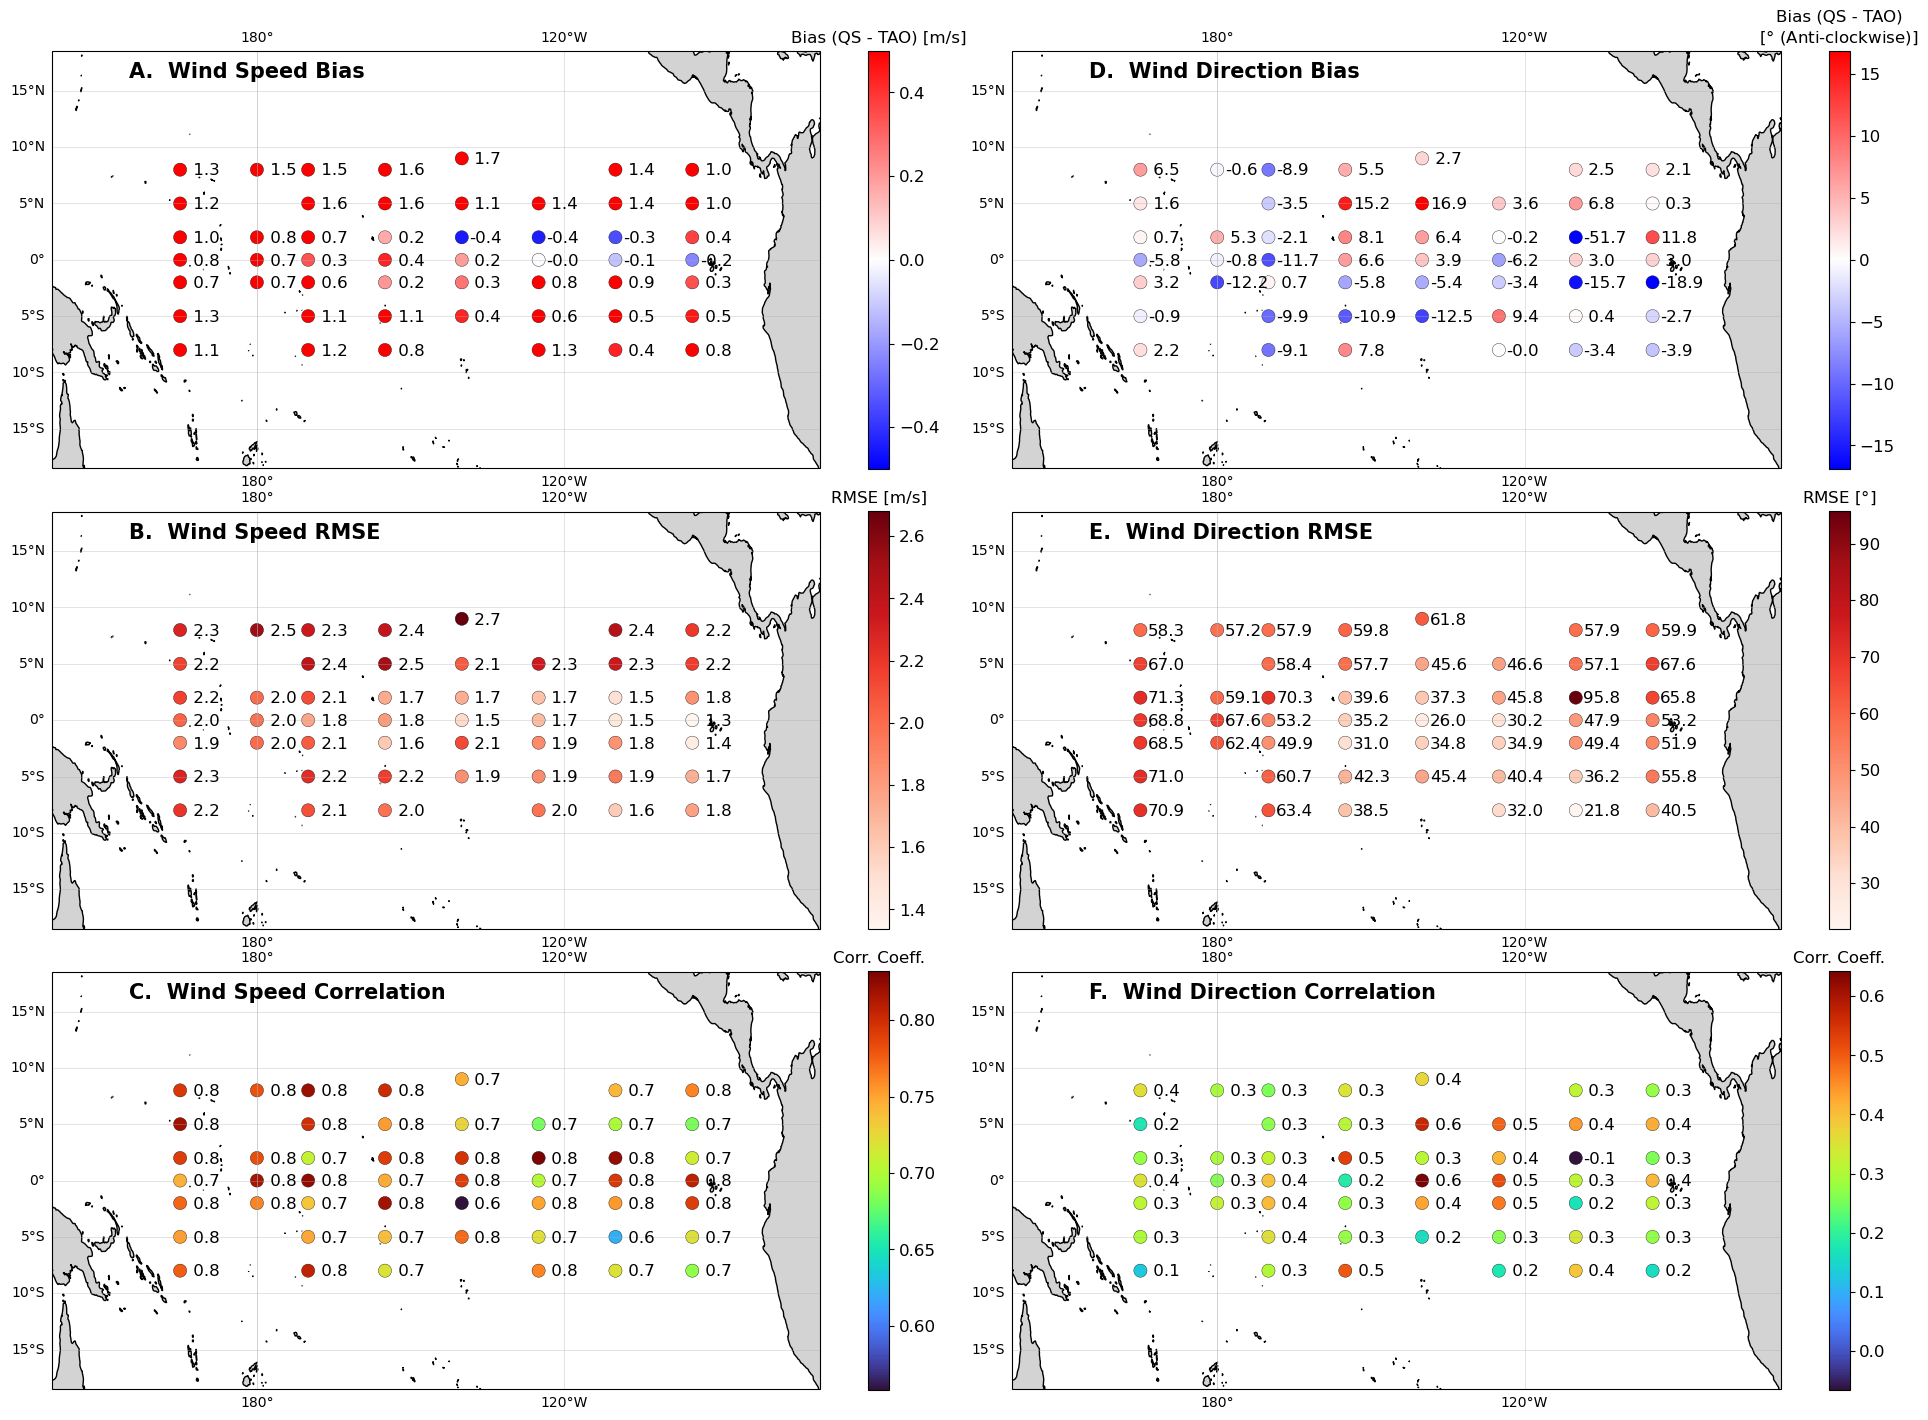

In [106]:
subDF = df.loc[df['label'] == -1]
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
fig, axes = plt.subplots(nrows = 3, 
                       ncols = 2, 
                        figsize = (22*0.9,18*0.8),
                         sharex = True,
                         sharey = True, 
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180),  "aspect": 2.2}) 

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)


fontSize = 15
fsz = 12
dotSize = 90
slw = 0.25
cbFs = 12
###################################################################################################################
ax = axes[0,0] 

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedBias(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.bwr, vmin= -0.5, vmax= 0.5)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Bias (QS - TAO) [m/s]')

ax.text(0.1, 0.95, 'A.  Wind Speed Bias', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)

###################################################################################################################
ax = axes[1,0]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedRMSE(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.Reds)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('RMSE [m/s]')

ax.text(0.1, 0.95, 'B.  Wind Speed RMSE', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
ax = axes[2,0]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.turbo)# vmin=0.40, vmax=0.85,)
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Corr. Coeff.')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'C.  Wind Speed Correlation', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
###################################################################################################################
ax = axes[0,1] 

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirBias(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.bwr, vmin= -np.max(plotList[:,2]), vmax= np.max(plotList[:,2]))
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Bias (QS - TAO)\n' + r'[$\degree$ (Anti-clockwise)]')

ax.text(0.1, 0.95, 'D.  Wind Direction Bias', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)

###################################################################################################################
ax = axes[1,1]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirRMSE(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.Reds)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title(r'RMSE [$\degree$]')

ax.text(0.1, 0.95, 'E.  Wind Direction RMSE', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
ax = axes[2,1]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.turbo)# vmin=0.40, vmax=0.85,)
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Corr. Coeff.')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'F.  Wind Direction Correlation', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################

plt.subplots_adjust(left = 0.03, right = 1, top =0.95 , bottom = 0.02, wspace=0 , hspace=0.1)

plt.savefig('BasicStats_bad.pdf', dpi=100)

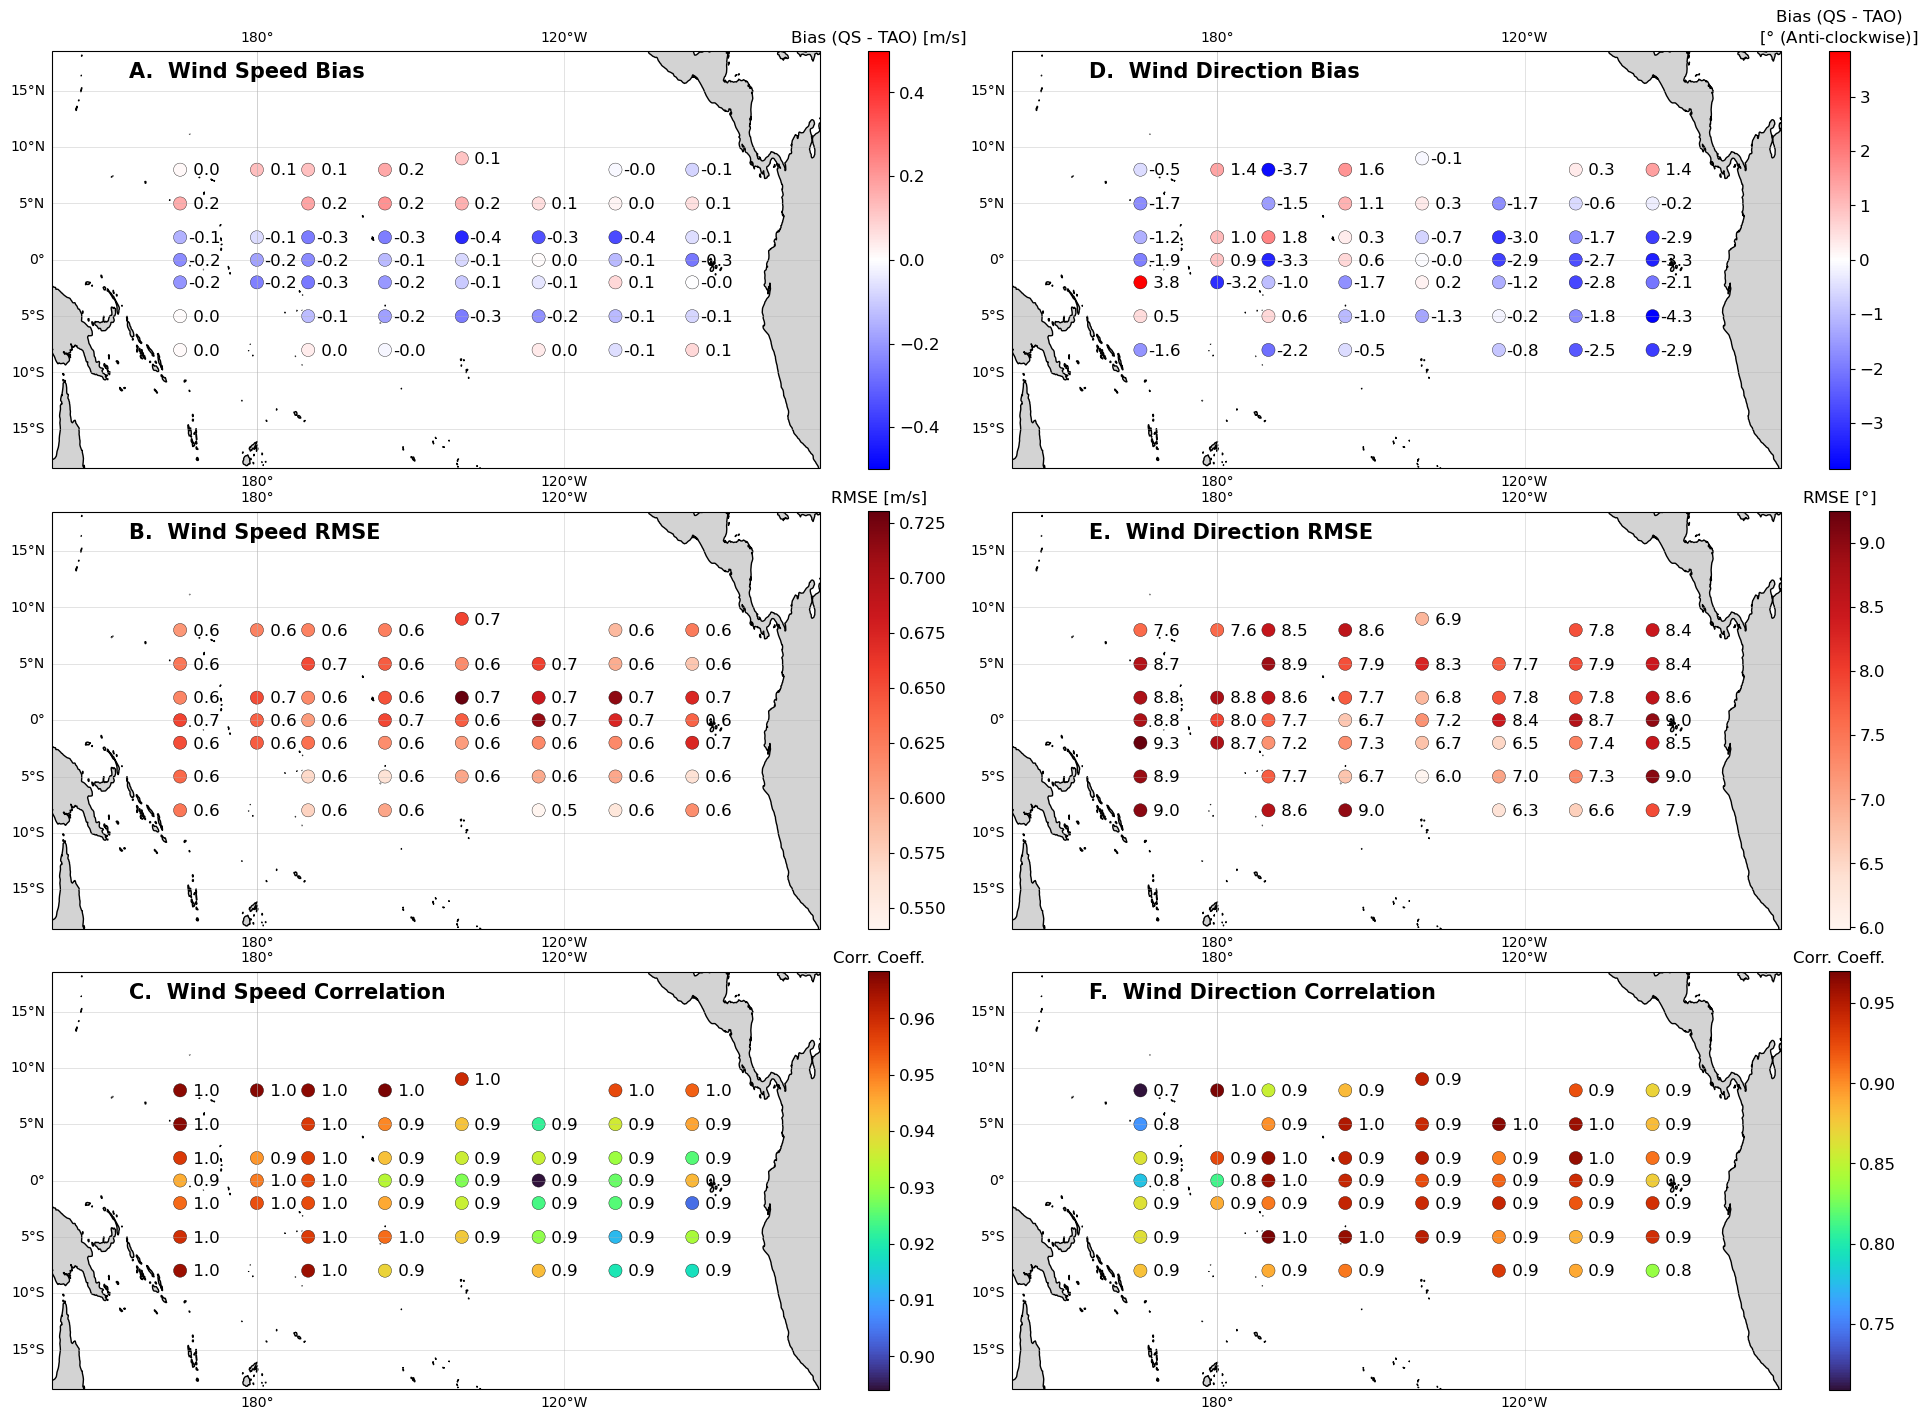

In [107]:
subDF = df.loc[df['label'] == 0]
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
fig, axes = plt.subplots(nrows = 3, 
                       ncols = 2, 
                        figsize = (22*0.9,18*0.8),
                         sharex = True,
                         sharey = True, 
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180),  "aspect": 2.2}) 

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)


fontSize = 15
fsz = 12
dotSize = 90
slw = 0.25
cbFs = 12
###################################################################################################################
ax = axes[0,0] 

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedBias(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.bwr, vmin= -0.5, vmax= 0.5)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Bias (QS - TAO) [m/s]')

ax.text(0.1, 0.95, 'A.  Wind Speed Bias', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)

###################################################################################################################
ax = axes[1,0]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedRMSE(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.Reds)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('RMSE [m/s]')

ax.text(0.1, 0.95, 'B.  Wind Speed RMSE', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
ax = axes[2,0]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.turbo)# vmin=0.40, vmax=0.85,)
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Corr. Coeff.')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'C.  Wind Speed Correlation', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
###################################################################################################################
ax = axes[0,1] 

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirBias(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.bwr, vmin= -np.max(plotList[:,2]), vmax= np.max(plotList[:,2]))
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Bias (QS - TAO)\n' + r'[$\degree$ (Anti-clockwise)]')

ax.text(0.1, 0.95, 'D.  Wind Direction Bias', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)

###################################################################################################################
ax = axes[1,1]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirRMSE(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.Reds)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title(r'RMSE [$\degree$]')

ax.text(0.1, 0.95, 'E.  Wind Direction RMSE', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################
ax = axes[2,1]

ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, alpha = 0.5)
ax.coastlines()

plotList = np.zeros((0,3), dtype=float)
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1.5, lat-0.5, f'{corr:4.1f}', fontsize = fsz)
        plotList = np.concatenate((plotList, np.array([[xpos, lat, corr]])), axis = 0)
        
x = ax.scatter(plotList[:,0], plotList[:,1], c=plotList[:,2], s=dotSize, edgecolor='black', linewidths=slw, cmap=cm.turbo)# vmin=0.40, vmax=0.85,)
cb = plt.colorbar(x, ax = ax)
cb.ax.tick_params(labelsize=cbFs)
cb.ax.set_title('Corr. Coeff.')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'F.  Wind Direction Correlation', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = fontSize)


###################################################################################################################

plt.subplots_adjust(left = 0.03, right = 1, top =0.95 , bottom = 0.02, wspace=0 , hspace=0.1)

plt.savefig('BasicStats_good.pdf', dpi=100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

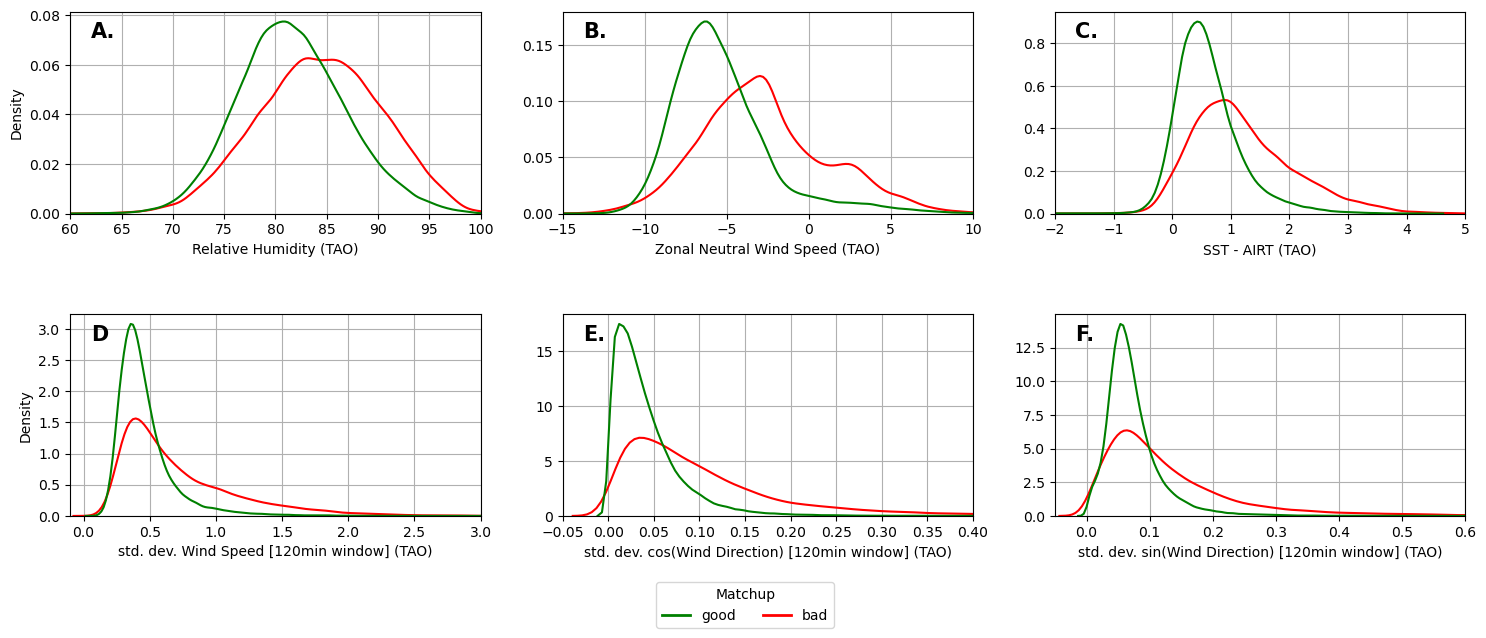

In [109]:
df['SST - AIRT (TAO)'] = df['Sea Surface Temperature (TAO)'] - df['Air Temperature (TAO)']

df.rename(columns={'std_WSPD': 'std. dev. WSPD 120min',
                   'std_cosWDIR': 'std. dev. cosWDIR 120min',
                   'std_sinWDIR': 'std. dev. sinWDIR 120min'}, inplace=True)

fig, axes = plt.subplots(nrows=2, ncols =3, sharex = False, figsize=(15,7))
histkind = "stack"
cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
custom_bins_RH = np.linspace(60,100,50)
custom_bins_SSTmAIRT = np.linspace(-2,5,50)
custom_bins_U10x = np.linspace(-10,10,50)
ny = 10
stack_order = {'good', 'bad'}

################################################################################################
################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[0,0]
#subDF = df.copy()
subDF = df.loc[df['Wind Speed (TAO)'] > 2]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF, x=xlabel, 
             #clip = (60,100), cut = 0, bw_adjust=0.5,
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
ax.set_xlim(60, 100)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'A.', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[0,1]

sns.kdeplot(subDF, x=xlabel, 
             #clip = (-10,10),cut = 0, bw_adjust=0.5, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
ax.set_xlim(-15, 10)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'B.', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'SST - AIRT (TAO)'
ax = axes[0,2]

sns.kdeplot(subDF, x=xlabel, 
             #clip = (-2,5),cut = 0, bw_adjust=0.5, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'},
             legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)

ax.set_xlim(-2, 5)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'C.', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


####################################################################################
xlabel = 'std. dev. WSPD 120min'
ax = axes[1,0]

sns.kdeplot(subDF, x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
ax.set_xlim(-0.1, 3)
#ax.set_title(title)
ax.set_xlabel('std. dev. Wind Speed [120min window] (TAO)')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'D', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[1,1]

sns.kdeplot(subDF, x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
ax.set_xlim(-0.05, 0.4)
#ax.set_title(title)
ax.set_xlabel('std. dev. cos(Wind Direction) [120min window] (TAO)')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'E.', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[1,2]

sns.kdeplot(subDF, x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
             legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
ax.set_xlim(-0.05, 0.6)
#ax.set_title(title)
ax.set_xlabel('std. dev. sin(Wind Direction) [120min window] (TAO)')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.05, 0.9, 'F.', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.subplots_adjust(left=0.05, bottom=0.18, right=0.98, top=0.9, wspace=0.20, hspace=0.5)

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.5, 0.01),
    title='Matchup'
)
plt.savefig('PDF_goodBadForRH_SSTmAIRT_stdDevs.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

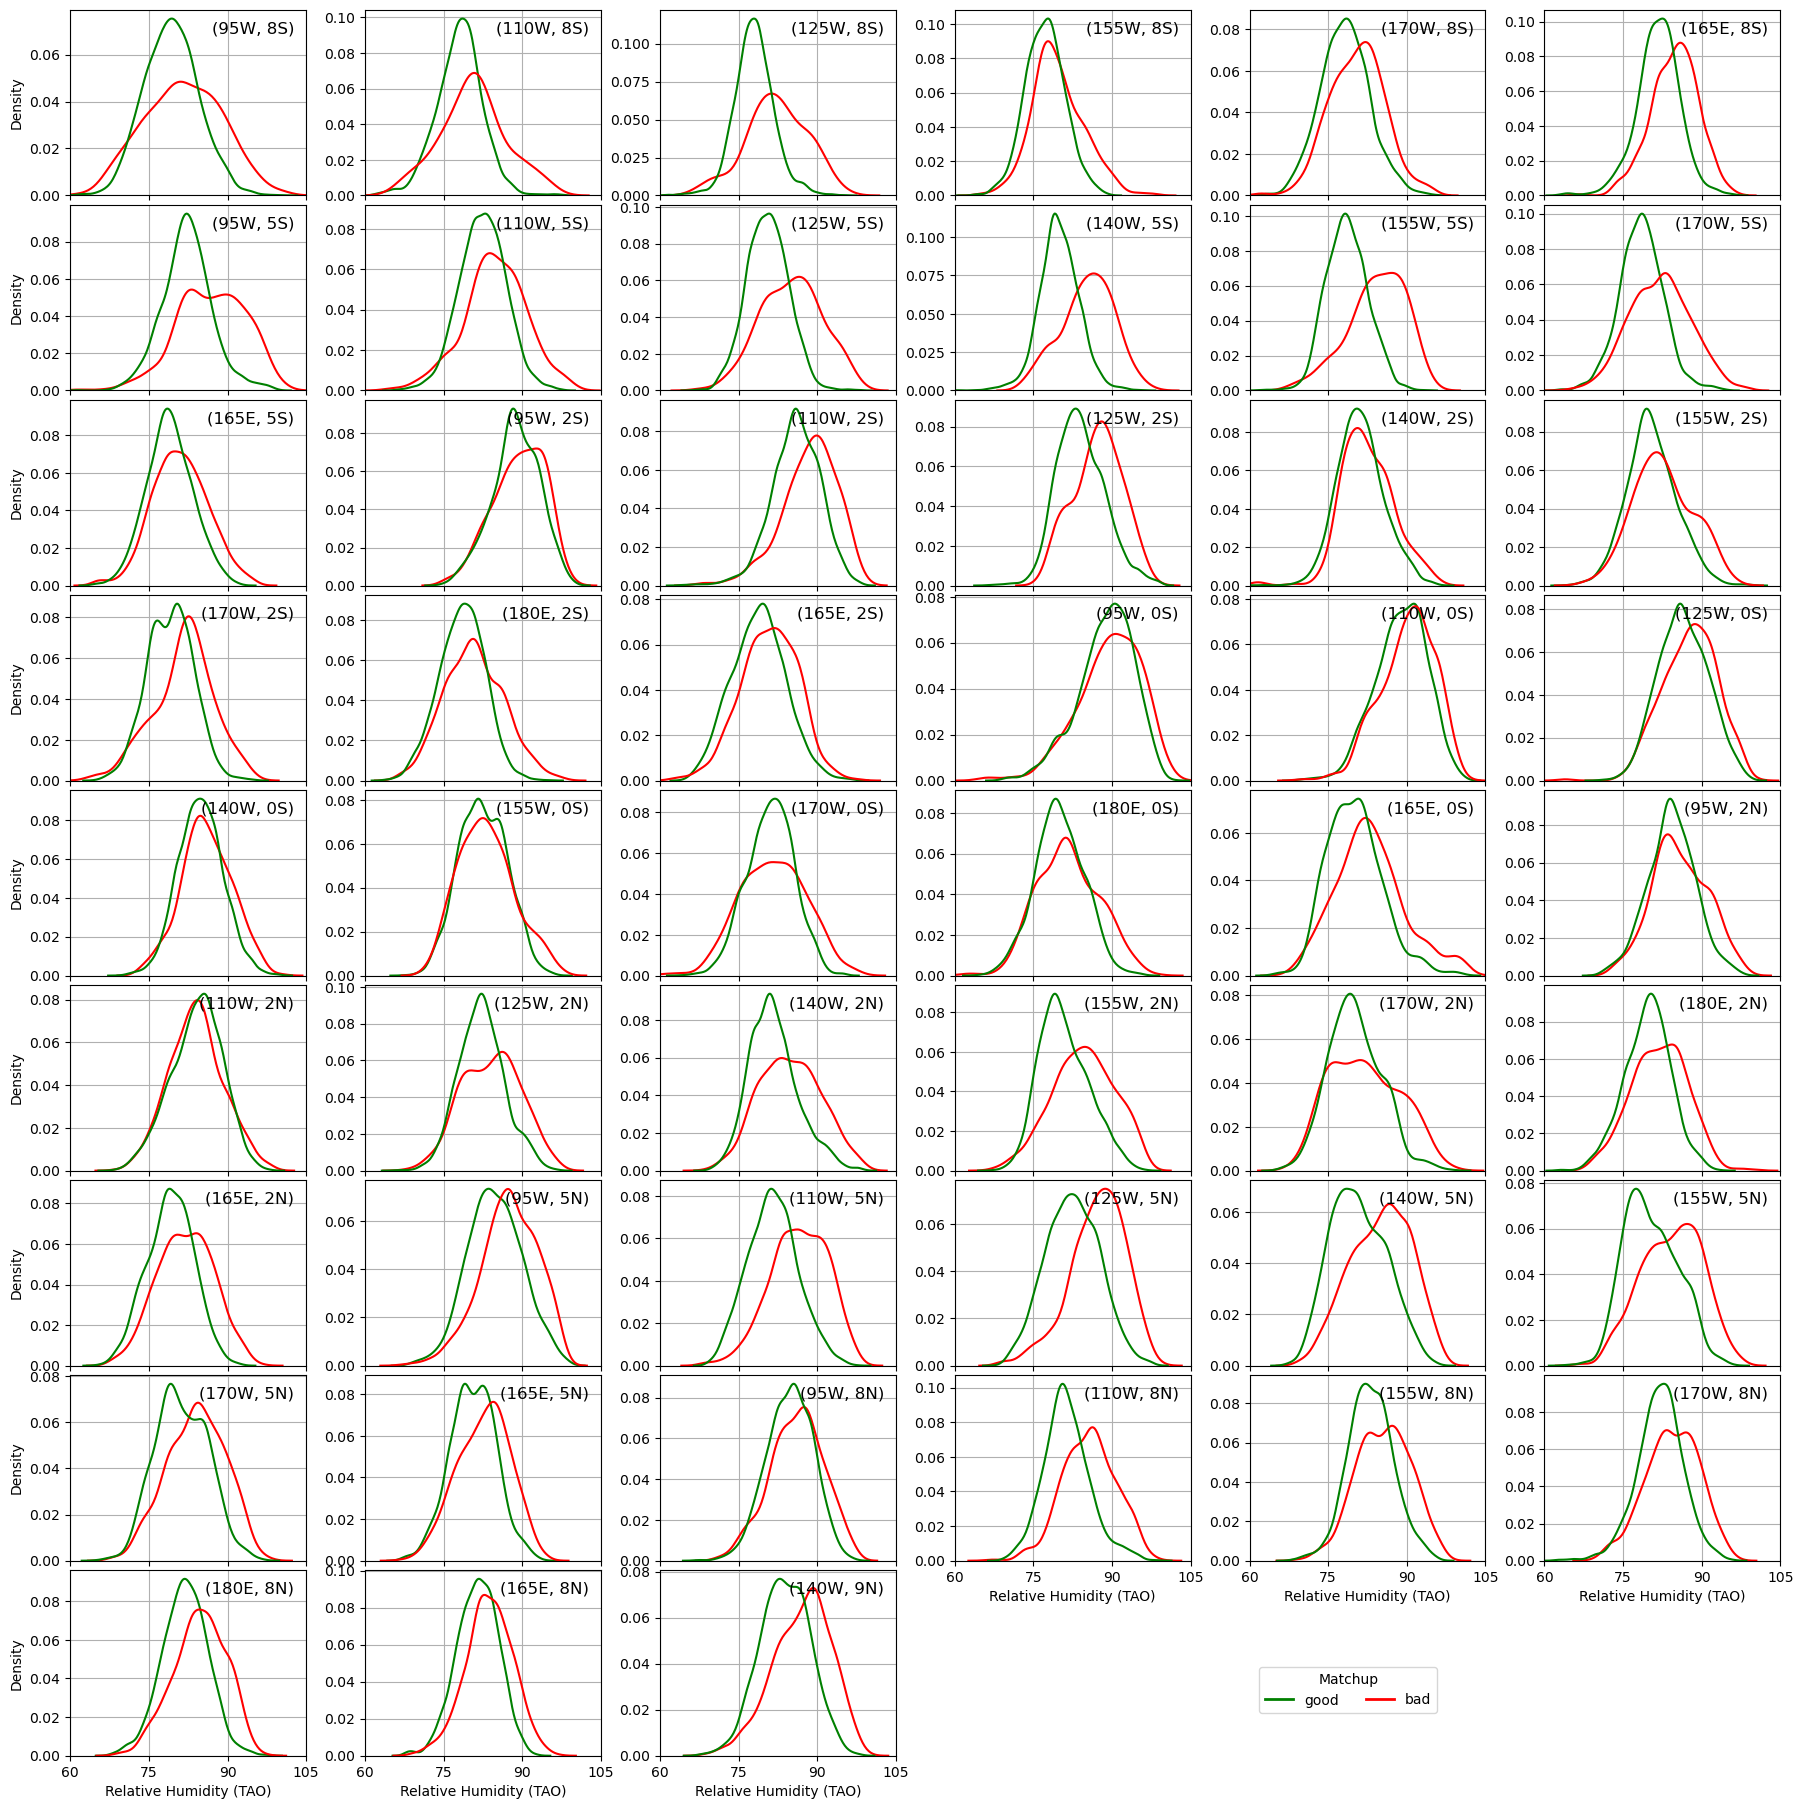

In [110]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'Relative Humidity (TAO)'
xtickLocs = np.linspace(60,105, 4)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:2.0f}' for val in xtickLocs], ha='center')

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)

plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.02, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_RH.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

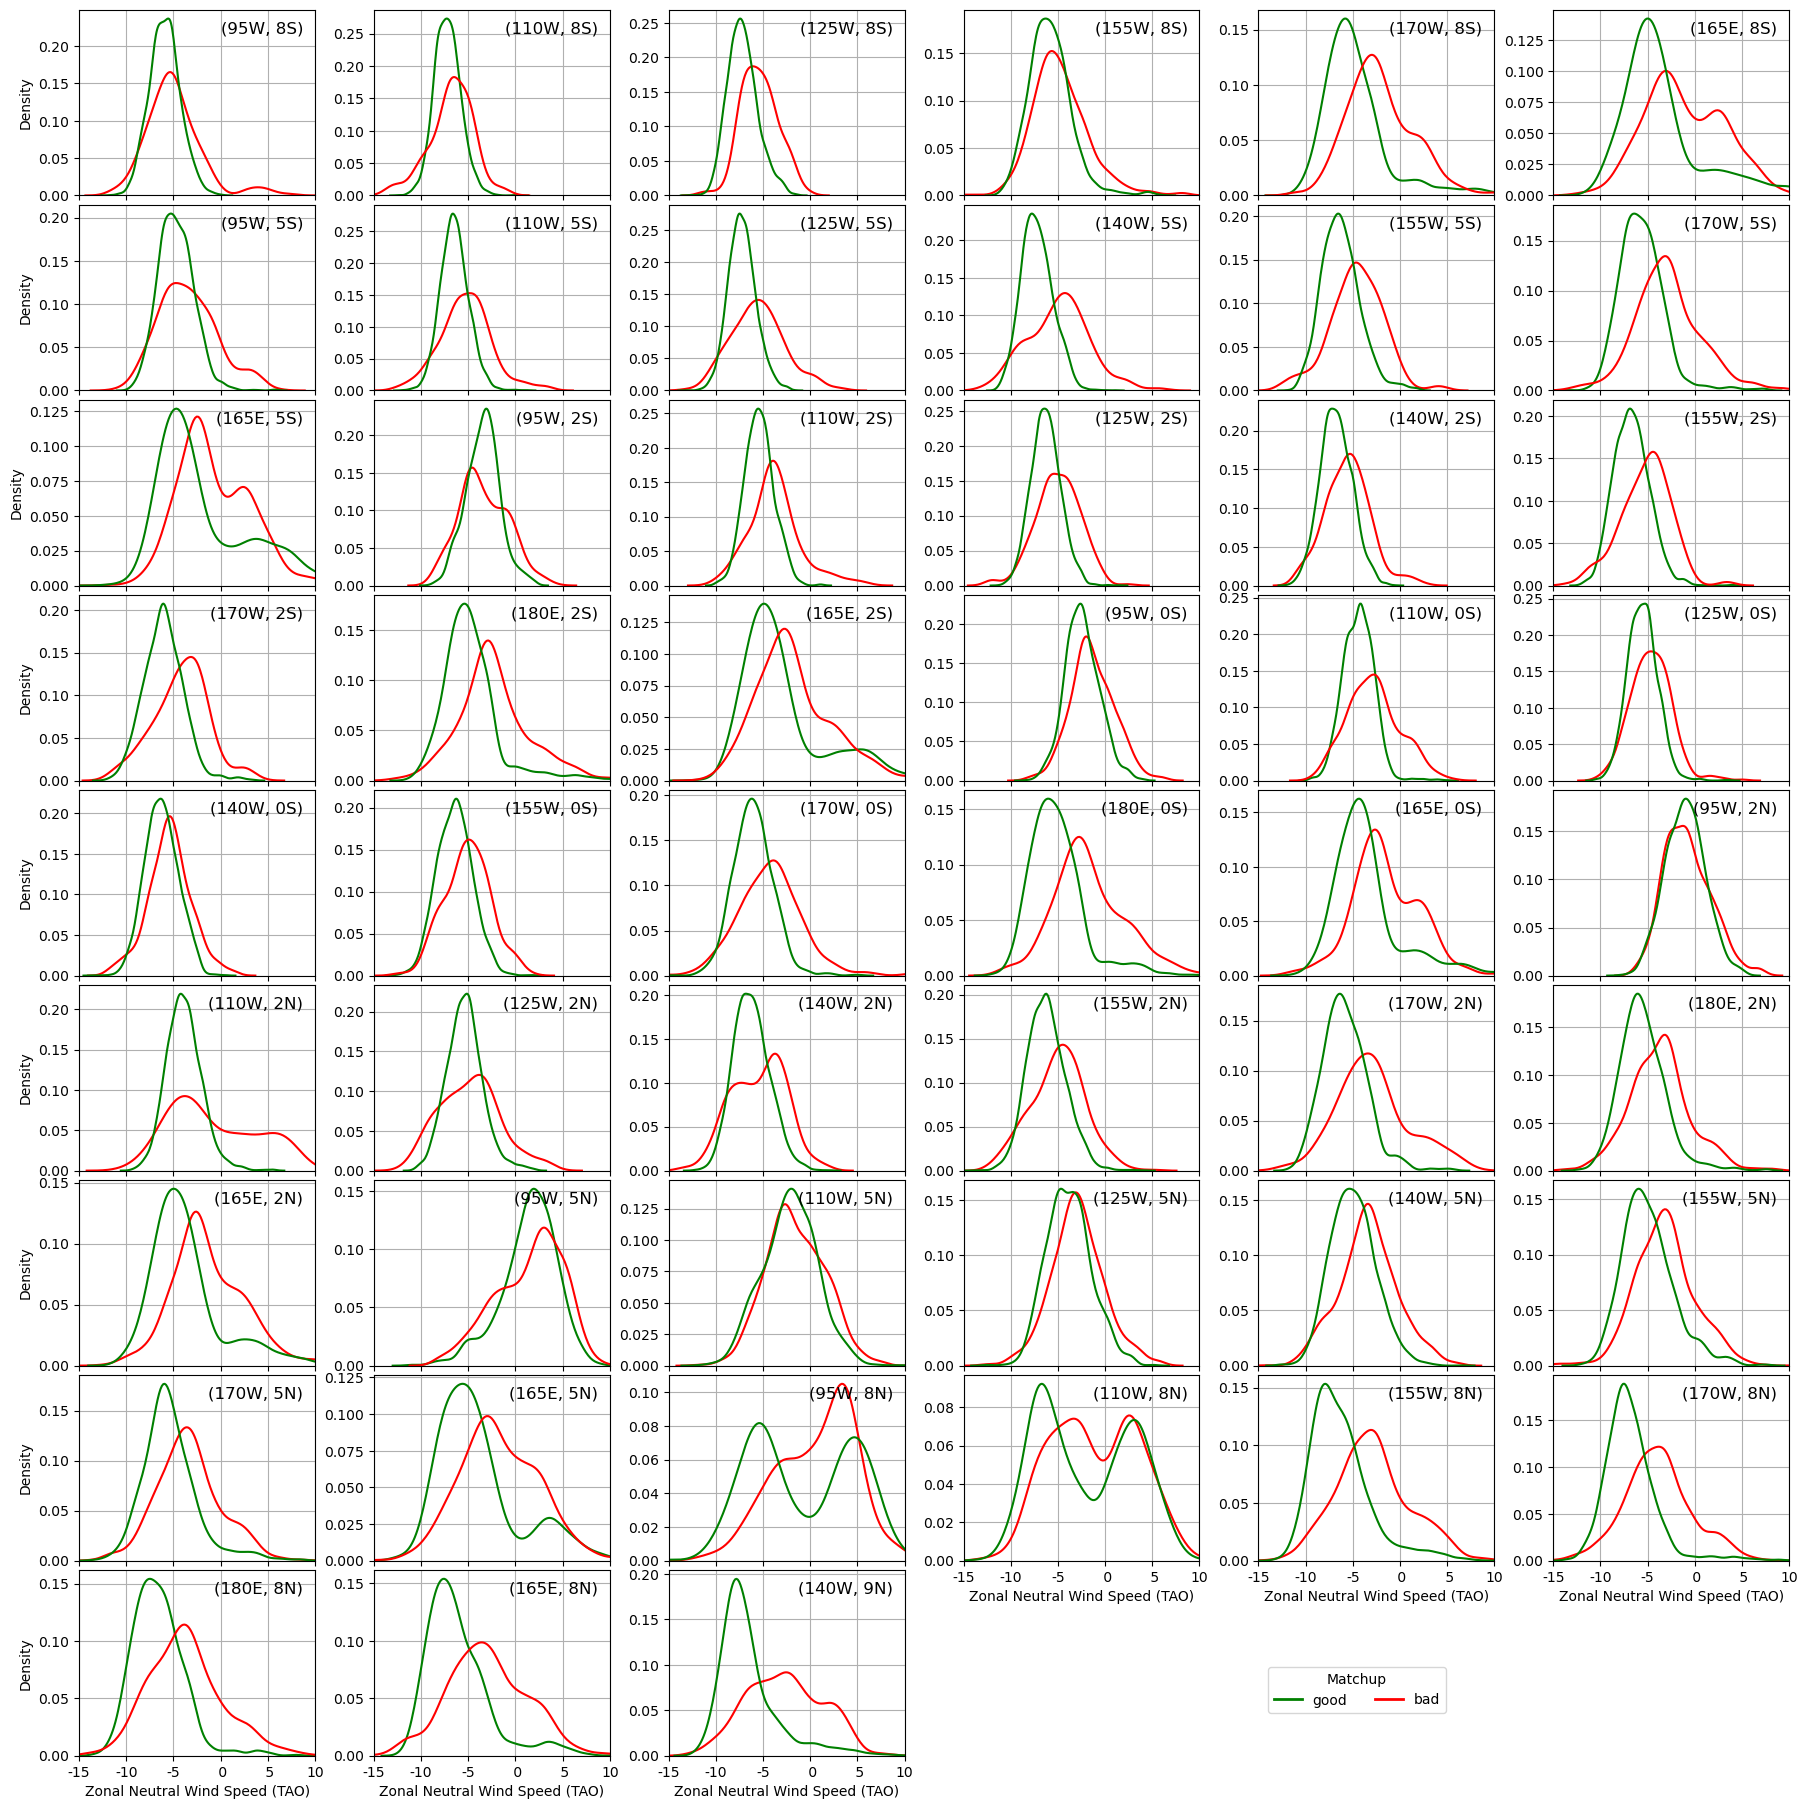

In [111]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'Zonal Neutral Wind Speed (TAO)'
xtickLocs = np.linspace(-15,10, 6)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:2.0f}' for val in xtickLocs], ha='center')

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)

plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.02, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_ZonalWinds.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

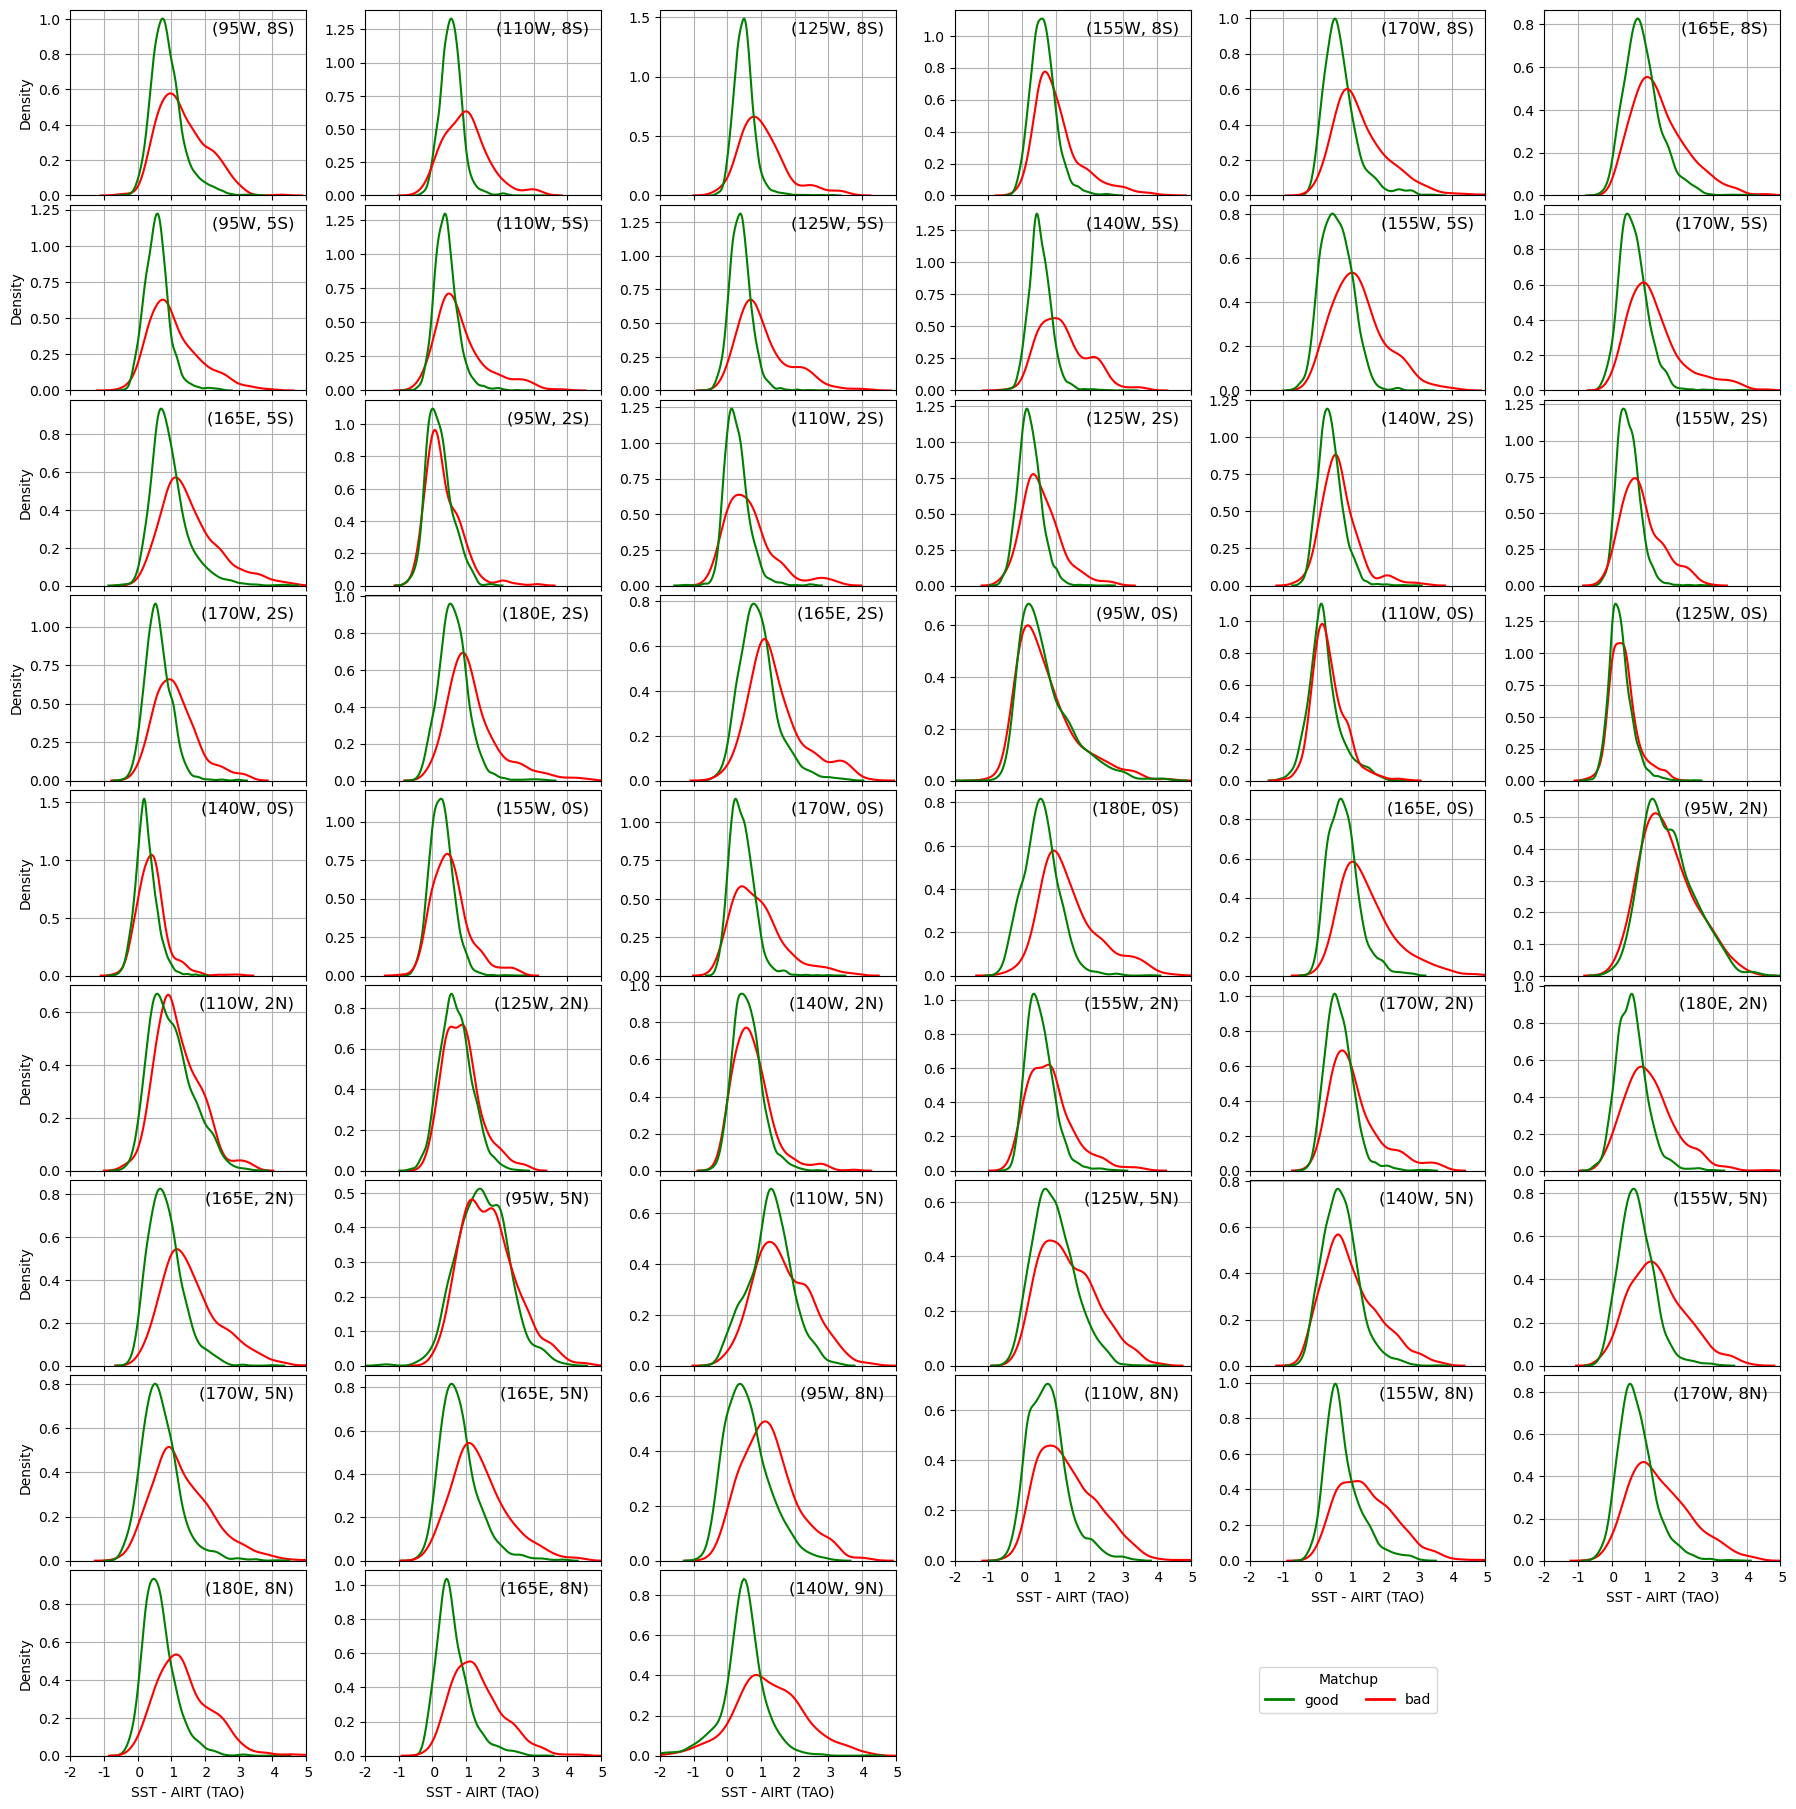

In [112]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'SST - AIRT (TAO)'
xtickLocs = np.linspace(-2,5, 8)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:2.0f}' for val in xtickLocs], ha='center')

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)

plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.02, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_SSTmAIRT.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

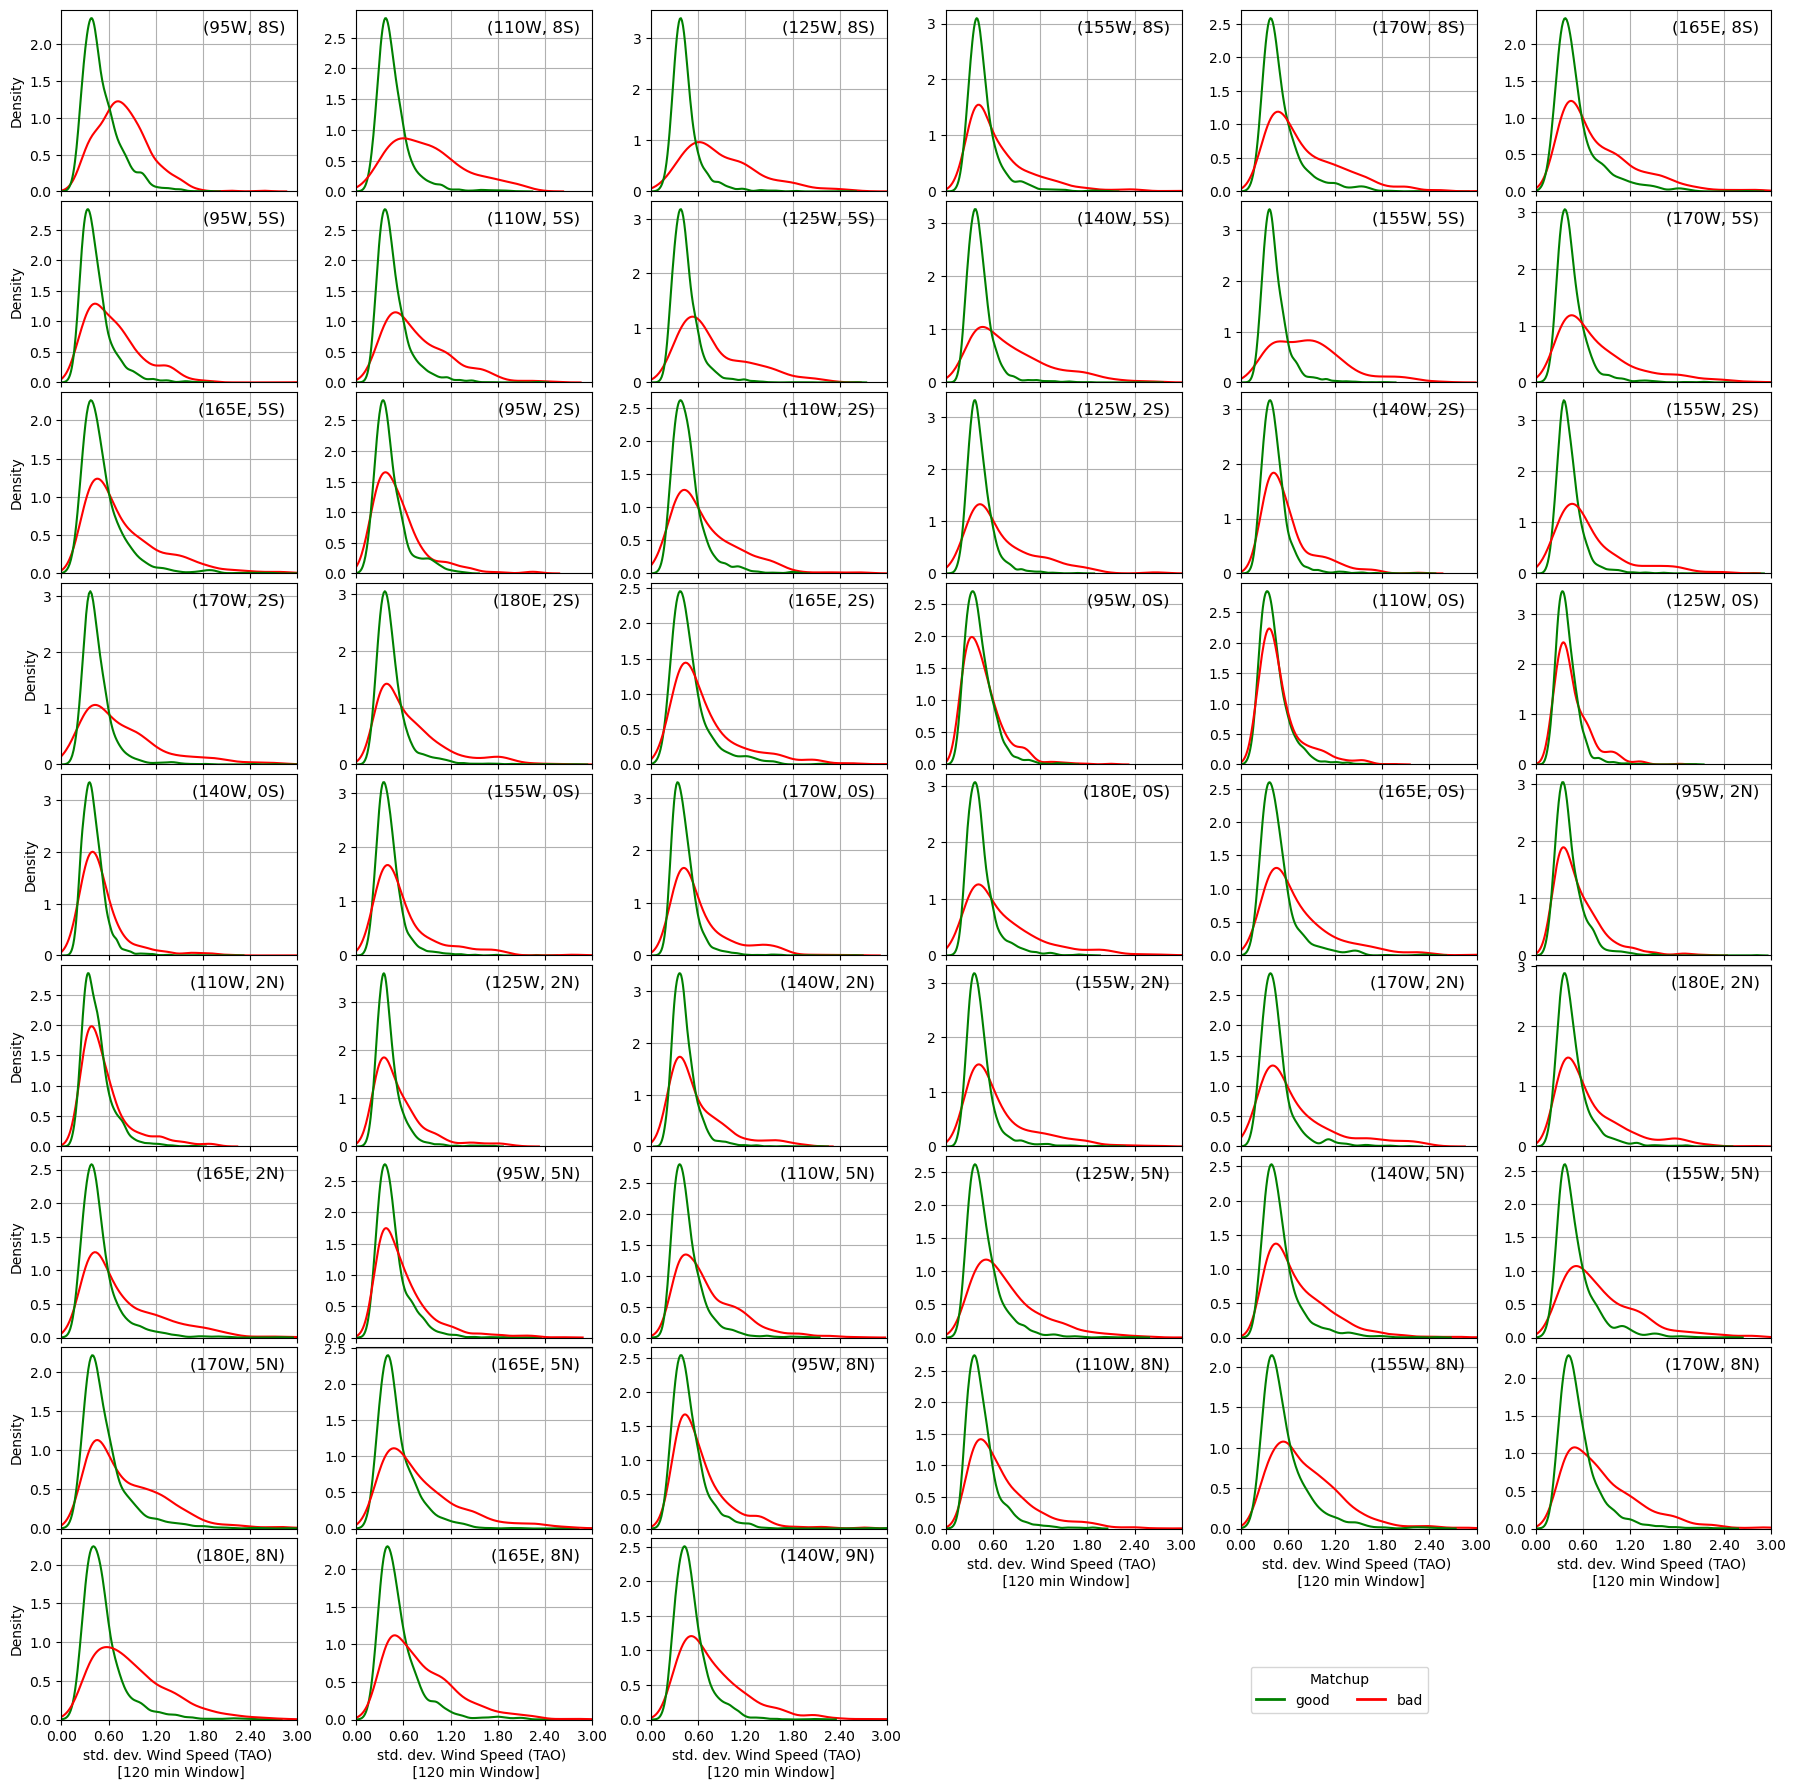

In [113]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'std. dev. WSPD 120min'
xtickLocs = np.linspace(0, 3, 6)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:4.2f}' for val in xtickLocs], ha='center')
    xlabel = 'std. dev. Wind Speed (TAO) \n [120 min Window]'
    axes[ii, jj].set_xlabel(xlabel)

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)

plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.04, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_stdWSPD.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

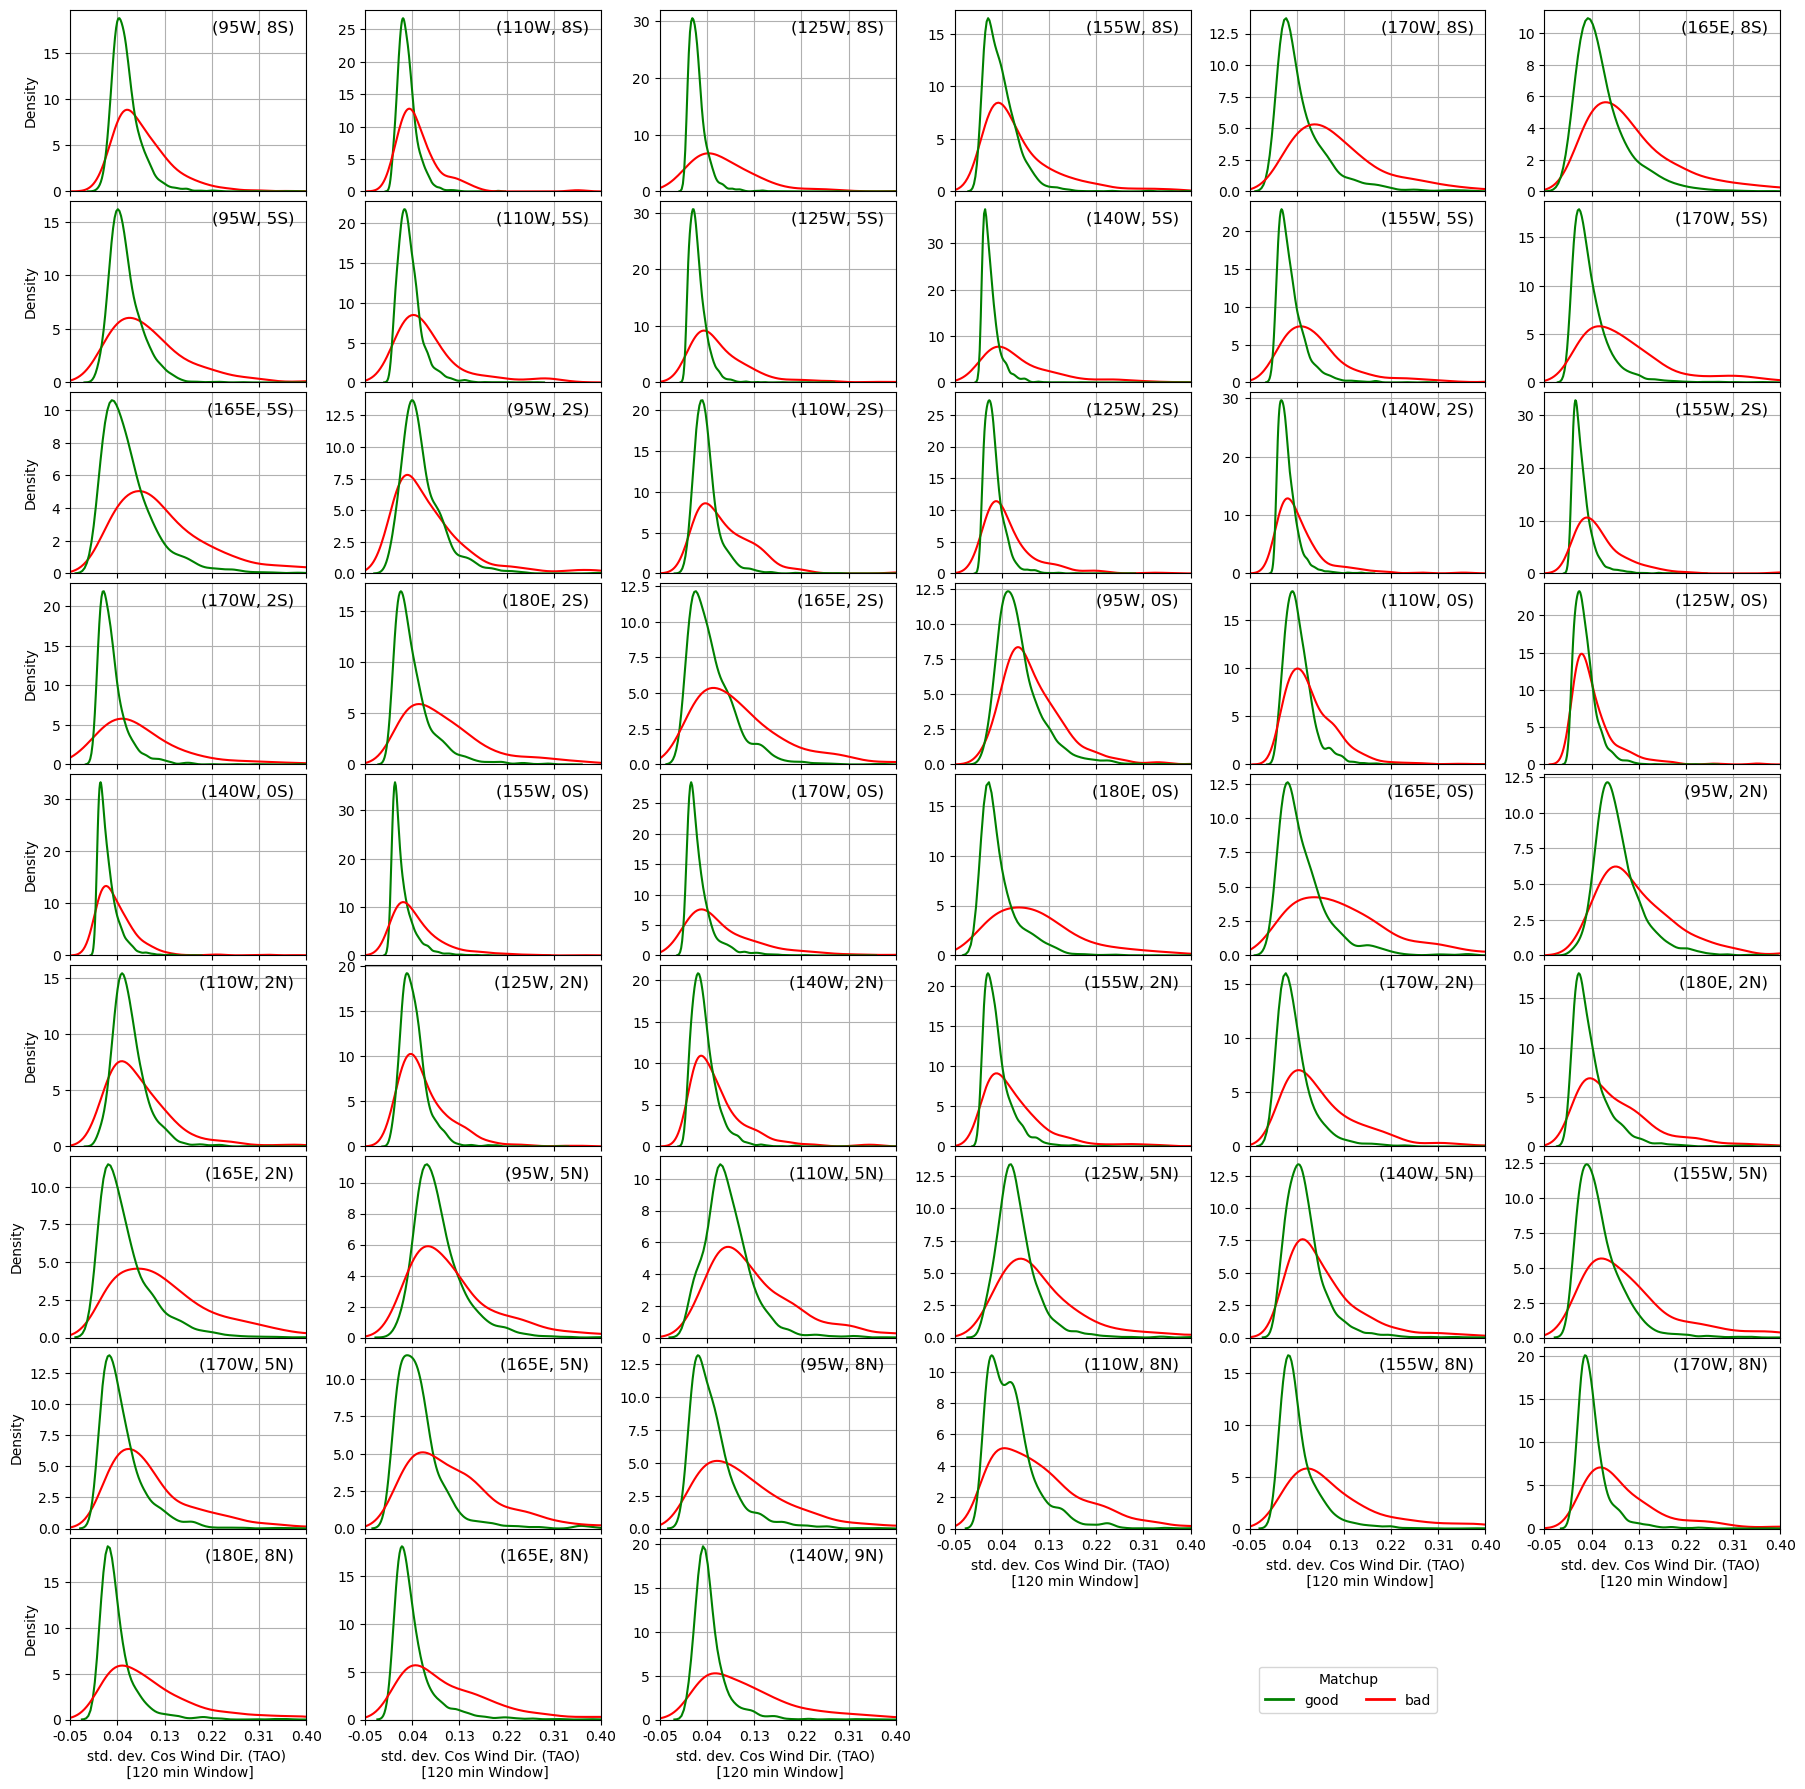

In [114]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'std. dev. cosWDIR 120min'
xtickLocs = np.linspace(-0.05, 0.4, 6)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:4.2f}' for val in xtickLocs], ha='center')
    xlabel = 'std. dev. Cos Wind Dir. (TAO) \n [120 min Window]'
    axes[ii, jj].set_xlabel(xlabel)

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)


plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.04, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_std_cosWDIR.pdf', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

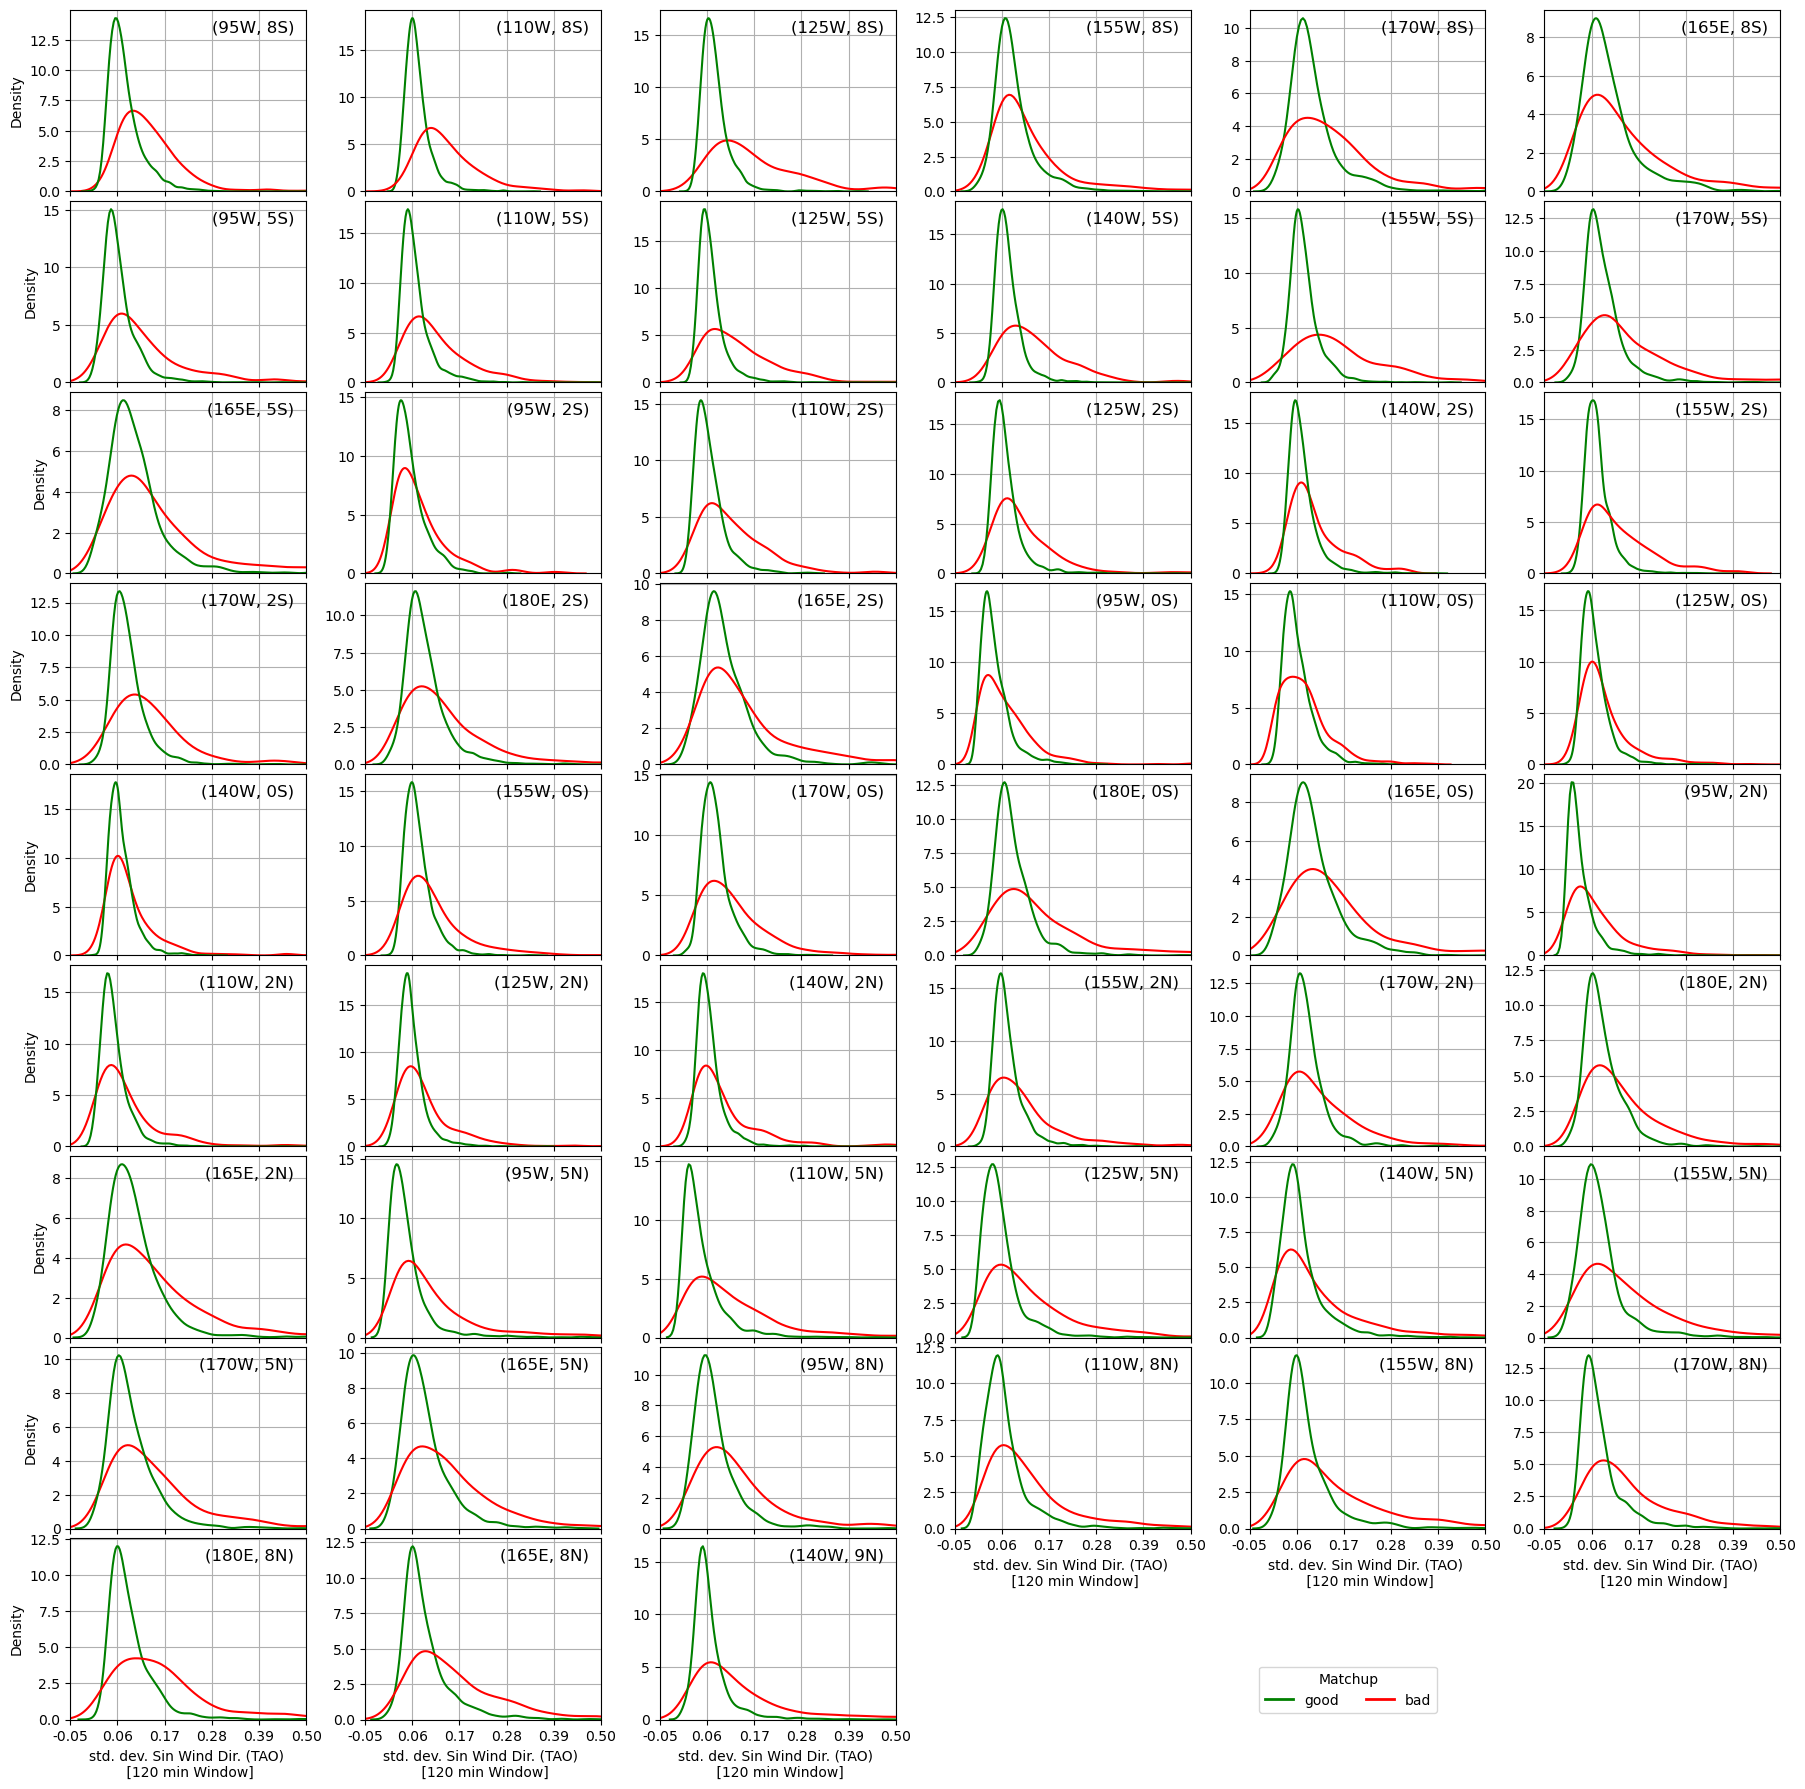

In [115]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

nx = 6
ny = int(51//nx) + 1
ylabel = 'Density'
xlabel = 'std. dev. sinWDIR 120min'
xtickLocs = np.linspace(-0.05, 0.5, 6)
fig, axes  = plt.subplots(nrows = ny, ncols =nx, figsize = (18,18), sharex = False, sharey = False)

maxRowInEachCol = np.zeros(nx, dtype = int)
i= 0
j = 0
done = False
while not done:
    task = taskList[j]
    ii = int(i//nx)
    jj = i%nx
    ax = axes[ii,jj]
    
    
    
    title = 'For Buoy locations lon < -165 E '
    lat = task[0]
    lon = task[1]
    
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF)> 0:
        subDF = subDF.loc[subDF['Wind Speed (TAO)'] > 2]
        subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
        # goodDF = subDF.loc[subDF['GoodBad'] == 'good']
        # badDF = subDF.loc[subDF['GoodBad'] == 'bad']
        
        sns.kdeplot(subDF, x=xlabel, 
                     #clip = (60,100), cut = 0, bw_adjust=0.5,
                     hue='Matchup Agreement', 
                     #multiple=histkind,
                     palette = {'good': 'green', 'bad': 'red'}, 
                    legend=False,
                     #hue_order=stack_order,
                     common_norm = False, 
                     ax = ax)
        ax.set_xlim(xtickLocs[0], xtickLocs[-1])
        ax.set_xticks(xtickLocs)
        ax.set_xticklabels([])
        ax.grid(visible=True, which='major')

        lon180 = lon if lon <= 180 else lon - 360
        
        lonUnit = 'E' if lon180 > 0 else 'W' 
        latUnit = 'N' if lat > 0 else 'S'
        txt = f'({abs(lon180)}{lonUnit}, {abs(lat)}{latUnit})'
        
        ax.text(0.95, 0.9, txt, horizontalalignment='right',
                verticalalignment='center', transform=ax.transAxes,
                fontsize = 12)


        if jj == 0:
            ax.set_ylabel(ylabel)
        else:
            ax.set_ylabel('')
        if maxRowInEachCol[jj] < ii:
            maxRowInEachCol[jj] = ii
    
        i = i+1
    if j < len(taskList)-1:
        j=j+1
    else:
        done = True

# Hide unused subplots
for i in range(51, nx * ny):
    ii = int(i//nx)
    jj = i%nx
    fig.delaxes(axes[ii, jj])  # removes unused axes cleanly


for i in range(nx):
    ii = maxRowInEachCol[i]
    jj = i%nx
    axes[ii, jj].set_xticklabels([f'{val:4.2f}' for val in xtickLocs], ha='center')
    xlabel = 'std. dev. Sin Wind Dir. (TAO) \n [120 min Window]'
    axes[ii, jj].set_xlabel(xlabel)

# 🌟 Add a single common legend
from matplotlib.lines import Line2D

# Custom legend handles
custom_lines = [
    Line2D([0], [0], color='green', lw=2, label='good'),
    Line2D([0], [0], color='red', lw=2, label='bad')
]

# Create the custom legend
fig.legend(
    handles=custom_lines,
    loc='lower center',
    ncol=len(custom_lines),
    bbox_to_anchor=(0.75, 0.04),
    title='Matchup'
)


plt.subplots_adjust(left = 0.04, right = 0.99, top = 0.99, bottom =0.04, wspace = 0.25, hspace = 0.05)
plt.savefig('pdf_std_sinWDIR.pdf', dpi = 100)